In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

In [2]:
def phantom_choices(option_1, option_2, option_3, choice, target_P, competitor_P):
    if((option_1 == "P_A") or (option_2 == "P_A") or (option_3 == "P_A")):
        if(choice == "A"):
            target_P = target_P + 1
        elif(choice == "B"):
            competitor_P = competitor_P + 1
    elif((option_1 == "P_B") or (option_2 == "P_B") or (option_3 == "P_B")):
        if(choice == "B"):
            target_P = target_P + 1
        elif(choice == "A"):
            competitor_P = competitor_P + 1
    return target_P, competitor_P

In [3]:
def getDecoyResponses(df, decoy_type):
    try:
        responses = df["Choice"].value_counts(normalize=True)[decoy_type]
    except KeyError:
        responses = 0
    return responses

def barGraphDecoys(mean_percentage, std_data, title):
    labels = ['Taget', 'Competitor', 'Decoy']
    x = np.arange(len(labels)) 
    y = mean_percentage
    error = std_data
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(labels, y, 0.9, yerr=std_data, capsize=8)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    plt.show()    
    
def barGraphDecoys3(mean_percentage, std_data, title, mean_percentage_LC, std_data_LC, title_LC, mean_percentage_HC, std_data_HC, title_HC):
    labels = ['Taget', 'Competitor', 'Decoy']
    
    fig, ax = plt.subplots(1, 3, figsize=(14, 5))
    
    x = np.arange(len(labels)) 
    y = mean_percentage
    error = std_data
    
    ax[0].bar(labels, y, 0.9, yerr=std_data, capsize=8)
    ax[0].set_ylim(0, 100)
    ax[0].set_ylabel('Percentage')
    ax[0].set_title(title)
    
    y_LC = mean_percentage_LC
    error_LC = std_data_LC
    
    ax[1].bar(labels, y_LC, 0.9, yerr=std_data_LC, capsize=8)
    ax[1].set_ylim(0, 100)
    ax[1].set_ylabel('Percentage')
    ax[1].set_title(title_LC)
    
    y_HC = mean_percentage_HC
    error_HC = std_data_HC
    
    ax[2].bar(labels, y_HC, 0.9, yerr=std_data_HC, capsize=8)
    ax[2].set_ylim(0, 100)
    ax[2].set_ylabel('Percentage')
    ax[2].set_title(title_HC)
    
    plt.show()    
    

In [4]:
def simDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "S_A") or (option_2 == "S_A") or (option_3) == "S_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif (choice == "S_A"):
            decoy_count = decoy_count + 1
        elif (choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    elif((option_1 == "S_B") or (option_2 == "S_B") or (option_3 == "S_B")):
        if(choice == "B"):
            target_count = target_count + 1
        elif (choice == "S_B"):
            decoy_count = decoy_count + 1
        elif (choice== "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error")
    return target_count, competitor_count, decoy_count
        
def comDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "C_A") or (option_2 == "C_A") or (option_3) == "C_A"):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "C_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    elif((option_1 == "C_B") or (option_2 == "C_B") or (option_3) == "C_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "C_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    return target_count, competitor_count, decoy_count

def attDecoy_Selection(option_1, option_2, option_3, choice, target_count, competitor_count, decoy_count):
    if((option_1 == "A_A") or (option_2 == "A_A") or (option_3 == "A_A")):
        if(choice == "A"):
            target_count = target_count + 1
        elif(choice == "A_A"):
            decoy_count = decoy_count + 1
        elif(choice == "B"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!")
    elif((option_1 == "A_B") or (option_2 == "A_B") or (option_3) == "A_B"):
        if(choice == "B"):
            target_count = target_count + 1
        elif(choice == "A_B"):
            decoy_count = decoy_count + 1
        elif(choice == "A"):
            competitor_count = competitor_count + 1
        else: 
            print("Error!") 
    return target_count, competitor_count, decoy_count

In [5]:
def partFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(num)")
    perc_name = str(decoy_type + "(%)")
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(num)', "Competitor(num)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    participants_list = decoy_df["Survey_ID"].unique()
    
    for idx in participants_list:
        current_participant = decoy_df[decoy_df["Survey_ID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, freq_name: decoy_counter, 'Target(%)': (target_counter/m)*100, 'Competitor(%)': (competitor_counter/m)*100, perc_name: (decoy_counter/m)*100}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_Decoy(decoy_df, decoy_type):
    
    freq_name = str(decoy_type + "(num)")
    perc_name = str(decoy_type + "(%)")
    
    item_list = decoy_df["Item"].unique()
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(num)', "Competitor(num)", freq_name, "Target(%)", "Competitor(%)", perc_name])
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        decoy_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            if(decoy_type == "Sim_Decoy"):
                target_counter, competitor_counter, decoy_counter = simDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Com_Decoy"):
                target_counter, competitor_counter, decoy_counter = comDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
            elif(decoy_type == "Att_Decoy"):
                target_counter, competitor_counter, decoy_counter = attDecoy_Selection(option_1, option_2, option_3, choice, target_counter, competitor_counter, decoy_counter)
        #Might add code to get sem.
        target_perc = np.round(((target_counter/m)*100), 1)
        competitor_perc = np.round(((competitor_counter/m)*100), 1)
        decoy_perc = np.round(((decoy_counter/m)*100), 1)
        current_item_freq = pd.DataFrame(data={'Item': item, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, freq_name: decoy_counter, 'Target(%)': target_perc, 'Competitor(%)': competitor_perc, perc_name: decoy_perc}, index=range(1))
        freq_df = freq_df.append(current_item_freq, ignore_index = True)
    return freq_df

def partFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['PID', 'Target(num)', "Competitor(num)", "Target(%)", "Competitor(%)"])
    
    participants_list = decoy_df["Survey_ID"].unique()
    
    for idx in participants_list:
        current_participant = decoy_df[decoy_df["Survey_ID"] == idx]
        current_participant = current_participant.reset_index()
        m, n = current_participant.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_participant["Option_1"][x]
            option_2 = current_participant["Option_2"][x]
            option_3 = current_participant["Option_3"][x]
            choice = current_participant["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        
        current_participant_freq = pd.DataFrame(data={'PID': idx, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, 'Target(%)': (target_counter/m)*100, 'Competitor(%)': (competitor_counter/m)*100}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df

def itemFreq_PhantomDecoy(decoy_df):
    
    freq_df = pd.DataFrame(columns=['Item', 'Target(num)', "Competitor(num)", "Target(%)", "Competitor(%)"])
    
    item_list = decoy_df["Item"].unique()
    
    for item in item_list:
        current_item = decoy_df[decoy_df["Item"] == item]
        current_item = current_item.reset_index()
        m, n = current_item.shape 
        
        target_counter = 0
        competitor_counter = 0
        
        for x in range(m):
            option_1 = current_item["Option_1"][x]
            option_2 = current_item["Option_2"][x]
            option_3 = current_item["Option_3"][x]
            choice = current_item["Choice"][x]
            
            target_counter, competitor_counter = phantom_choices(option_1, option_2, option_3, choice, target_counter, competitor_counter)
        target_perc = np.round((target_counter/m)*100, 1)
        competitor_perc = np.round((competitor_counter/m)*100, 1)
        current_participant_freq = pd.DataFrame(data={'Item': item, 'Target(num)': target_counter, 'Competitor(num)': competitor_counter, 'Target(%)': target_perc, 'Competitor(%)': competitor_perc}, index=range(1))
        freq_df = freq_df.append(current_participant_freq, ignore_index = True)
    return freq_df
            


## Load and Pre-process data

In [6]:
# Now open a directory/folder "/zDemo_data"
fd = os.open("Participants_data", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/Decoy/22AY_01_Code/Participants_data


In [7]:
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create DataFrame storing the demographic info 
col_names = ['Age', 'Sex', 'Race', 'Ethnicity', 'Date', 'PID', 'SurveyID', 'Email', 'CouplingCondition', 'PhantomCondition']
demographic_info_df = pd.DataFrame(columns=col_names)

for file in csv_files: 
    df = pd.read_csv(file)
    # Check if first row contains demographic info
                      
    if((df["Gender"][0] == "Male") or (df["Gender"][0] == "Female") or (df["Gender"][0] == "Other")): 
        Age = df["Age"][0]
        Sex = df["Gender"][0]
        Race = df["Race"][0]
        Ethnicity = df["Ethnicity"][0]
        Date = df["Date"][0]
        PID = df["User_PID"][0]
        SurveyID = df["Survey_ID"][0]
        Email = df["User_email"][0]
        CouplingCondition = df["Coupling"][0]
        PhantomCondition = df["Phantom_condition"][0]
        
        demo_col = pd.DataFrame(data={'Age': Age, 'Sex': Sex, 'Race': Race, 'Ethnicity': Ethnicity, 'Date': Date, 'PID': PID, 'SurveyID': SurveyID, 'Email': Email, 'CouplingCondition': CouplingCondition,  'PhantomCondition': PhantomCondition}, index=range(1))
        demographic_info_df = demographic_info_df.append(demo_col, ignore_index = True)
    else: 
        print("Error: " + str(file))

demographic_info_df.head(40)


,Age,Sex,Race,Ethnicity,Date,PID,SurveyID,Email,CouplingCondition,PhantomCondition
0,18,Female,Not_hispanic,White,04/11/2022,16938385,40781,ehefner@ucsd.edu,High coupling,Highly_desirable
1,21,Female,Not_hispanic,East_Asian,04/08/2022,17212732,40447,kyc002@ucsd.edu,Low coupling,Highly_desirable
2,23,Female,Not_hispanic,White,04/07/2022,16083027,34796,mengel@ucsd.edu,Low coupling,Weakly_desirable
3,22,Female,Not_hispanic,East_Asian,04/11/2022,15501740,33898,lnn019@ucsd.edu,High coupling,Weakly_desirable
4,22,Male,Not_hispanic,East_Asian,04/11/2022,16587075,37993,bgfang@ucsd.edu,High coupling,Undesirable
5,20,Male,Not_hispanic,East_Asian,04/10/2022,16358315,36203,yuw091@ucsd.edu,Low coupling,Undesirable
6,19,Female,Not_hispanic,White,04/07/2022,16521128,40548,mmollaha@ucsd.edu,Low coupling,Highly_desirable
7,19,Female,Not_hispanic,East_Asian,04/08/2022,16302756,39056,jtl003@ucsd.edu,High coupling,Undesirable
8,19,Female,Not_hispanic,East_Asian,04/10/2022,16727090,40719,m6chau@ucsd.edu,High coupling,Highly_desirable
9,21,Male,Not_hispanic,East_Asian,04/10/2022,15584833,33553,ytung@ucsd.edu,Low coupling,Undesirable


In [8]:
#Pre-process data 

all_responses = pd.DataFrame(columns=['Decoy', 'Item', 'Option_1', 'Option_2', 'Option_3', 'Choice', 'CatchTrials', 'Deliberation_RT', 'Choice_RT', 'Too_Slow'])

for file in csv_files: 
    df = pd.read_csv(file)
    Survey_ID = df["Survey_ID"][0]
    phantom_condition = df["Phantom_condition"][0]
    coupling_condition = df["Coupling"][0]
    
    #Check shape of file
    n, m = df.shape
    for x in range(n):
        # Select rows corresponding to choices.
        if((df["User_email"][x]!="C") and (df["User_email"][x]!="F") and (df["User_email"][x]!="A") and (df["User_email"][x]!="S") and (df["User_email"][x]!="P")): #pd.isna(df["Item"][x])
            df.drop([x])
        else: 
            decoy = df["User_email"][x]
            item = df["Gender"][x]
            Option_1 = df["Age"][x]
            Option_2 = df["Phantom_condition"][x]
            Option_3 = df["Race"][x]
            Choice = df["User_PID"][x]
            CatchTrials = df["Date"][x]
            Deliberation_RT = df["Survey_ID"][x]
            Choice_RT = df["Ethnicity"][x]
            Too_Slow = df["Coupling"][x]
            
            demo_col = pd.DataFrame(data={'Decoy': decoy, 'Item': item, 'Option_1': Option_1, 'Option_2': Option_2, 'Option_3': Option_3, 'Choice': Choice, 'CatchTrials': CatchTrials, 'Deliberation_RT': Deliberation_RT, 'Choice_RT': Choice_RT, 'Too_Slow': Too_Slow, 'Survey_ID': Survey_ID, 'CouplingCondition': coupling_condition, 'PhantomCondition': phantom_condition}, index=range(1))
            all_responses = all_responses.append(demo_col, ignore_index = True)

print(all_responses.shape)
all_responses.head(10)

(10500, 13)


,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Survey_ID,CouplingCondition,PhantomCondition
0,F,Kitchen Scale,A,C,B,C,NaN,10000,620,0,40781,High coupling,Highly_desirable
1,C,Baby crib,C_A,B,A,A,NaN,10000,389.0,0,40781,High coupling,Highly_desirable
2,S,Baby high chair,A,B,S_B,B,NaN,10000,761,0,40781,High coupling,Highly_desirable
3,A,Leaf Blower,A,B,A_B,A,NaN,10000,308,0,40781,High coupling,Highly_desirable
4,P,Wifi extender,A,B,P_B,A,NaN,10000,586.0,0,40781,High coupling,Highly_desirable
5,P,Electric mop,A,P_B,B,B,NaN,10000,451,0,40781,High coupling,Highly_desirable
6,C,Smart lock,C_B,A,B,B,NaN,10000,285.0,0,40781,High coupling,Highly_desirable
7,S,Air Fryer Oven,B,S_A,A,A,NaN,10000,301,0,40781,High coupling,Highly_desirable
8,F,Stun gun,B,A,C,B,NaN,10000,297,0,40781,High coupling,Highly_desirable
9,A,Smart bulb,A,B,A_A,A,NaN,10000,371,0,40781,High coupling,Highly_desirable


In [9]:
# Pre process RT data, turn 'str' to NaN, then remove NaN.
all_responses["Choice_RT"] = pd.to_numeric(all_responses["Choice_RT"], errors='coerce')
RT_df = all_responses["Choice_RT"].dropna()
RT_df = RT_df/1000

In [10]:
#RT_df.head()

In [11]:
Participants_PIDs = all_responses["Survey_ID"].unique()
total_n = int(len(Participants_PIDs))

print(Participants_PIDs)
print("Total number of particiants: " + str(total_n))

number_of_low_coupling = demographic_info_df["CouplingCondition"].str.count("Low coupling").sum()
print("Total number of participants 'low coupling':" + str(number_of_low_coupling))  

number_of_high_coupling = demographic_info_df["CouplingCondition"].str.count("High coupling").sum()
print("Total number of participants 'high coupling':" + str(number_of_high_coupling))  

['40781' '40447' '34796' '33898' '37993' '36203' '40548' '39056' '40719'
 '33553' '41241' '41067' '36391' '30471' '40763' '40815' '36300' '36432'
 '43075' '39540' '36123' '32575' '28943' '41031' '29949' '42119' '42405'
 '40309' '42195' '42626' '37059' '35108' '35606' '41387' '35868' '31893'
 '40441' '33506' '40637' '43188' '35956' '37555' '33918' '42530' '40082'
 '43507' '42344' '36605' '31478' '40584' '37478' '43641' '41830' '32218'
 '28973' '36195' '39449' '38627' '36354' '40514' '43126' '27691' '42674'
 '33494' '40539' '32912' '41850' '35788' '38324' '33428' '40314' '40220'
 '36723' '26982' '36592' '42234' '34547' '43687' '35998' '39031' '35920'
 '35848' '36984' '41650' '43646' '42552' '41036' '35602' '37439' '41469'
 '41840' '38312' '41293' '43659' '32946' '35432' '42743' '31365' '32782'
 '42652' '40483' '37897' '40590' '32196' '31733']
Total number of particiants: 105
Total number of participants 'low coupling':50
Total number of participants 'high coupling':55


## Participants RT

In [12]:
# Checking mean response time

rt_mean = RT_df.mean()
rt_mean = rt_mean#/1000

print("Group mean response time: " + str(round(rt_mean, 2)) + " sec.")

Group mean response time: 1.43 sec.


In [13]:
# Checking mean response time per participant 

group_rt_df = pd.DataFrame(columns=['PID', 'Mean_RT (sec)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    participant_rt = all_responses[all_responses["Survey_ID"] == x]["Choice_RT"].apply(float).mean()/1000
    participant_rt = round(participant_rt, 2)
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Mean_RT (sec)': participant_rt}, index=range(1))
    group_rt_df = group_rt_df.append(current_p_df, ignore_index = True)

#group_rt_df.head(40)

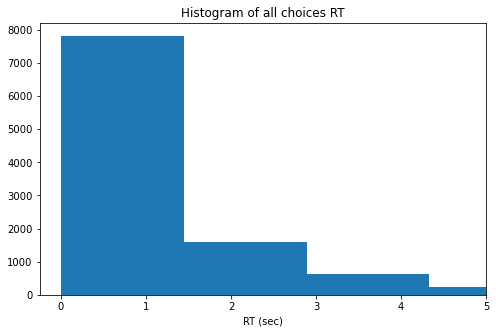

In [14]:
plt.subplots(figsize=(8, 5))
plt.hist(RT_df, bins=100)
plt.title('Histogram of all choices RT')
plt.xlabel('RT (sec)')
plt.xlim(-.25, 5)
plt.show()


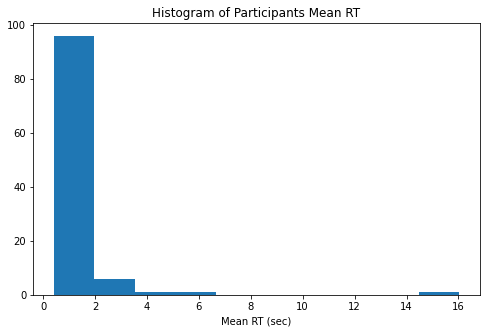

In [15]:
plt.subplots(figsize=(8, 5))
plt.hist(group_rt_df["Mean_RT (sec)"], bins=10)
plt.title('Histogram of Participants Mean RT')
plt.xlabel('Mean RT (sec)')
plt.show()


## Catch Trials 

In [16]:
# Checking filler/catch trials work as expected.

filler_total = all_responses[all_responses["Decoy"] =="F"]["Choice"].count()
filler_catch = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("C").sum()
filler_miss = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("B").sum() + all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("A").sum()
print("Total number of catch trials: " + str(filler_total))
print("Total 'catch trials' correct: " + str(filler_catch))
print("Total 'catch trials' incorrect': " + str(filler_miss))

print("\n Correct trials avg: " + str(round(filler_catch/filler_total, 2)*100) + "%")
print("\n Incorrect trials avg: " + str(round(filler_miss/filler_total, 2)*100) + "%")


Total number of catch trials: 2100
Total 'catch trials' correct: 1542
Total 'catch trials' incorrect': 558

 Correct trials avg: 73.0%

 Incorrect trials avg: 27.0%


In [17]:
# Each participants catch trials info

group_catch_df = pd.DataFrame(columns=['PID', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    current_part_catch_df = all_responses[all_responses["Survey_ID"] == x]
    current_part_catch_df = current_part_catch_df[current_part_catch_df["Decoy"] =="F"]
    current_part_total_trials = current_part_catch_df["Choice"].count()
    current_part_catch_freq = current_part_catch_df["Choice"].str.count("C").sum()
    current_part_miss_freq = current_part_catch_df["Choice"].str.count("B").sum() + current_part_catch_df["Choice"].str.count("A").sum()
    current_part_catch_perc = current_part_catch_freq/current_part_total_trials
    current_part_miss_perc = current_part_miss_freq/current_part_total_trials
    
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Correct(num)': current_part_catch_freq, "Incorrect(num)": current_part_miss_freq, "Correct(%)": current_part_catch_perc*100, "Incorrect(%)": current_part_miss_perc*100}, index=range(1))
    group_catch_df = group_catch_df.append(current_p_df, ignore_index = True)
    
#group_catch_df.head(40)


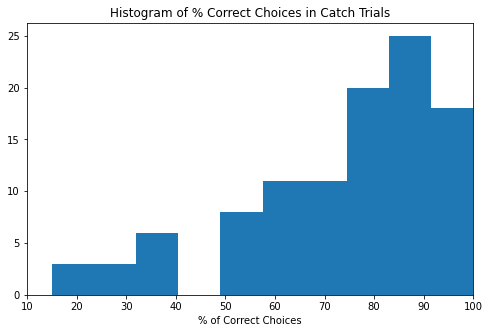

In [18]:
plt.subplots(figsize=(8, 5))
plt.hist(group_catch_df["Correct(%)"], bins=10)
plt.title('Histogram of % Correct Choices in Catch Trials')
plt.xlabel('% of Correct Choices')
plt.xlim(10, 100)
plt.show()


In [19]:
catch_items_df = all_responses[all_responses["Decoy"] =="F"]
catch_summary_df = pd.DataFrame(columns=['Item', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)', "Times_Encountered"])

catch_items_list = catch_items_df["Item"].unique()

for item in catch_items_list: 
    
    current_item_catch_df = catch_items_df[catch_items_df["Item"] == item]
    times_encountered = current_item_catch_df["Choice"].count()
    current_item_catch_freq = current_item_catch_df["Choice"].str.count("C").sum()
    current_item_miss_freq = current_item_catch_df["Choice"].str.count("B").sum() + current_item_catch_df["Choice"].str.count("A").sum()
    current_item_catch_perc = current_item_catch_freq/times_encountered
    current_item_miss_perc = current_item_miss_freq/times_encountered
    
    current_item_catch_perc = np.round(current_item_catch_perc, 2)
    current_item_miss_perc = np.round(current_item_miss_perc, 2)
    
    current_i_df = pd.DataFrame(data={'Item': item, 'Correct(num)': current_item_catch_freq, "Incorrect(num)": current_item_miss_freq, "Correct(%)": current_item_catch_perc*100, "Incorrect(%)": current_item_miss_perc*100, "Times_Encountered":times_encountered}, index=range(1))
    catch_summary_df = catch_summary_df.append(current_i_df, ignore_index = True)

catch_summary_df.head(20)

,Item,Correct(num),Incorrect(num),Correct(%),Incorrect(%),Times_Encountered
0,Kitchen Scale,68,37,65.0,35.0,105
1,Stun gun,66,30,69.0,31.0,96
2,Hearing aid,74,31,70.0,30.0,105
3,Alarm clock,76,22,78.0,22.0,98
4,Megaphone,77,22,78.0,22.0,99
5,Thermometer gun,74,18,80.0,20.0,92
6,Outdoor TV antenna,77,30,72.0,28.0,107
7,Wagon cart,79,30,72.0,28.0,109
8,Baby rocker,79,21,79.0,21.0,100
9,Inflatable baby pool,85,31,73.0,27.0,116


### Filter/remove participants with Correct(%) ≤ 50 

In [20]:
participants_to_filter_out = group_catch_df[group_catch_df["Correct(%)"] <= 75]["PID"].unique()

print("Participants to filter out: " +  str(participants_to_filter_out))

Participants to filter out: ['36203' '40548' '40719' '30471' '40763' '40815' '43075' '39540' '36123'
 '32575' '42119' '42195' '42626' '35606' '41387' '31893' '33918' '42530'
 '40082' '36605' '31478' '40584' '32218' '28973' '39449' '38627' '43126'
 '27691' '42674' '32912' '41850' '35788' '38324' '40220' '36723' '26982'
 '36592' '34547' '39031' '35920' '41650' '43646' '41036' '41293' '43659'
 '35432' '42743' '31365' '42652' '32196' '31733']


In [21]:
all_responses = all_responses[all_responses.Survey_ID.isin(participants_to_filter_out) == False]

In [22]:
Participants_PIDs = all_responses["Survey_ID"].unique()
total_n = int(len(Participants_PIDs))

print("Total number of particiants: " + str(total_n))
print(Participants_PIDs)

Total number of particiants: 54
['40781' '40447' '34796' '33898' '37993' '39056' '33553' '41241' '41067'
 '36391' '36300' '36432' '28943' '41031' '29949' '42405' '40309' '37059'
 '35108' '35868' '40441' '33506' '40637' '43188' '35956' '37555' '43507'
 '42344' '37478' '43641' '41830' '36195' '36354' '40514' '33494' '40539'
 '33428' '40314' '42234' '43687' '35998' '35848' '36984' '42552' '35602'
 '37439' '41469' '41840' '38312' '32946' '32782' '40483' '37897' '40590']


## Displaying Decoys in space

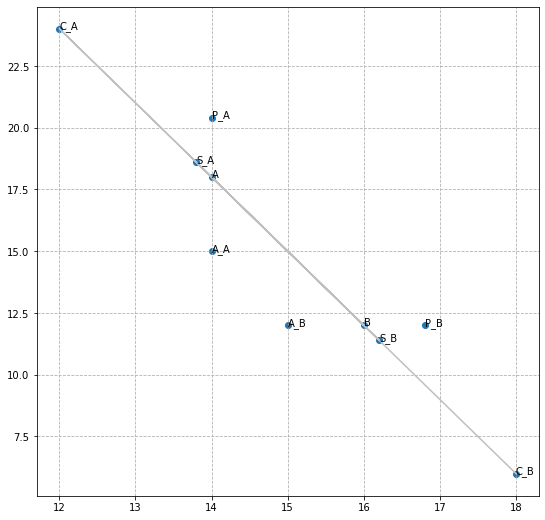

In [23]:
x = np.array([14, 16, 14, 16.8, 14, 15, 13.8, 16.2, 12, 18])
y = np.array([18, 12, 20.4, 12, 15, 12, 18.6, 11.4, 24, 6])

x1 = np.array([14, 16, 13.8, 16.2, 12, 18])
y1 = np.array([18, 12, 18.6, 11.4, 24, 6])

plt.subplots(figsize=(9, 9))
plt.plot(x1, y1, color='0.75')
plt.scatter(x, y)
plt.annotate("A", (x[0], y[0]))
plt.annotate("B", (x[1], y[1]))
plt.annotate("P_A", (x[2], y[2]))
plt.annotate("P_B", (x[3], y[3]))
plt.annotate("A_A", (x[4], y[4]))
plt.annotate("A_B", (x[5], y[5]))
plt.annotate("S_A", (x[6], y[6]))
plt.annotate("S_B", (x[7], y[7]))
plt.annotate("C_A", (x[8], y[8]))
plt.annotate("C_B", (x[9], y[9]))

plt.grid(linestyle = '--')
plt.show()

## Similarity Decoy

In [24]:
def get_decoy_stats(df, kind, participants_num):
    
    mean_i = round(df[kind].mean(), 2)
    std_i = df[kind].std()
    sem_i = round((std_i/np.sqrt(participants_num)), 2)
    
    return mean_i, std_i, sem_i

In [25]:
decoy_S_df = all_responses[all_responses["Decoy"] == "S"]
decoy_S_df_LowC = decoy_S_df[decoy_S_df["CouplingCondition"] == "Low coupling"]
decoy_S_df_HighC = decoy_S_df[decoy_S_df["CouplingCondition"] == "High coupling"]

decoy_S_df = decoy_S_df.reset_index()
decoy_S_df_LowC = decoy_S_df_LowC.reset_index()
decoy_S_df_HighC = decoy_S_df_HighC.reset_index()

group_sim_freq_df = partFreq_Decoy(decoy_S_df, "Sim_Decoy")
group_sim_freq_df_LowC = partFreq_Decoy(decoy_S_df_LowC, "Sim_Decoy")
group_sim_freq_df_HighC = partFreq_Decoy(decoy_S_df_HighC, "Sim_Decoy")

# Get mean, std, and sem for all participatns.
target_S_mean, target_S_std, target_S_sem = get_decoy_stats(group_sim_freq_df, "Target(%)", total_n)
competitor_S_mean, competitor_S_std, competitor_S_sem = get_decoy_stats(group_sim_freq_df, "Competitor(%)", total_n)
decoy_S_mean, decoy_S_std, decoy_S_sem = get_decoy_stats(group_sim_freq_df, "Sim_Decoy(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_S_LowC_mean, target_S_LowC_std, target_S_LowC_sem = get_decoy_stats(group_sim_freq_df_LowC, "Target(%)", number_of_low_coupling)
competitor_S_LowC_mean, competitor_S_LowC_std, competitor_S_LowC_sem = get_decoy_stats(group_sim_freq_df_LowC, "Competitor(%)", number_of_low_coupling)
decoy_S_LowC_mean, decoy_S_LowC_std, decoy_S_LowC_sem = get_decoy_stats(group_sim_freq_df_LowC, "Sim_Decoy(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_S_HighC_mean, target_S_HighC_std, target_S_HighC_sem = get_decoy_stats(group_sim_freq_df_HighC, "Target(%)", number_of_high_coupling)
competitor_S_HighC_mean, competitor_S_HighC_std, competitor_S_HighC_sem = get_decoy_stats(group_sim_freq_df_HighC, "Competitor(%)", number_of_high_coupling)
decoy_S_HighC_mean, decoy_S_HighC_std, decoy_S_HighC_sem = get_decoy_stats(group_sim_freq_df_HighC, "Sim_Decoy(%)", number_of_high_coupling)

# Show info for all groups.
Sim_summary_df = pd.DataFrame({'Target mean(%)': [target_S_mean, target_S_LowC_mean, target_S_HighC_mean],
                  'Target sem(%)': [target_S_sem, target_S_LowC_sem, target_S_HighC_sem],
                  'Comp mean(%)': [competitor_S_mean, competitor_S_LowC_mean, competitor_S_HighC_mean],
                  'Comp sem(%)': [competitor_S_sem, competitor_S_LowC_sem, competitor_S_HighC_sem],
                  'Decoy mean(%)': [decoy_S_mean, decoy_S_LowC_mean, decoy_S_HighC_mean],
                  'Decoy sem(%)': [decoy_S_sem, decoy_S_LowC_sem, decoy_S_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

Sim_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
All,48.43,2.21,23.33,1.65,28.24,1.35
LowCoupling,49.81,2.32,20.74,1.45,29.44,1.57
HighCoupling,47.04,2.20,25.93,1.81,27.04,1.16


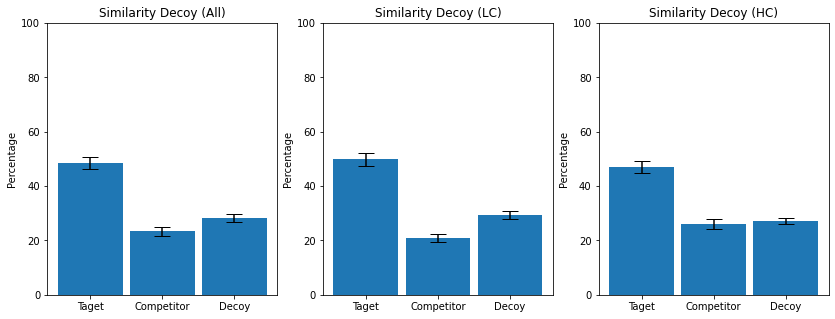

In [26]:
sim_decoy_mean_perc = np.array([target_S_mean, competitor_S_mean, decoy_S_mean])
sim_decoy_sems = np.array([target_S_sem, competitor_S_sem, decoy_S_sem])

sim_decoy_mean_perc_LC = np.array([target_S_LowC_mean, competitor_S_LowC_mean, decoy_S_LowC_mean])
sim_decoy_sems_LC = np.array([target_S_LowC_sem, competitor_S_LowC_sem, decoy_S_LowC_sem])

sim_decoy_mean_perc_HC = np.array([target_S_HighC_mean, competitor_S_HighC_mean, decoy_S_HighC_mean])
sim_decoy_sems_HC = np.array([target_S_HighC_sem, competitor_S_HighC_sem, decoy_S_HighC_sem])

barGraphDecoys3(sim_decoy_mean_perc, sim_decoy_sems, 'Similarity Decoy (All)', sim_decoy_mean_perc_LC, sim_decoy_sems_LC, 'Similarity Decoy (LC)', sim_decoy_mean_perc_HC, sim_decoy_sems_HC, 'Similarity Decoy (HC)')

In [27]:
#Similarity Decoy (Inv. part. data)
group_sim_freq_df.head(40)

,PID,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,40781,12,2,6,60.0,10.0,30.0
1,40447,7,7,6,35.0,35.0,30.0
2,34796,12,5,3,60.0,25.0,15.0
3,33898,9,4,7,45.0,20.0,35.0
4,37993,2,11,7,10.0,55.0,35.0
5,39056,12,5,3,60.0,25.0,15.0
6,33553,9,4,7,45.0,20.0,35.0
7,41241,13,4,3,65.0,20.0,15.0
8,41067,8,7,5,40.0,35.0,25.0
9,36391,5,10,5,25.0,50.0,25.0


## Compromise Decoy

In [28]:
decoy_C_df = all_responses[all_responses["Decoy"] == "C"]
decoy_C_df_LowC = decoy_C_df[decoy_C_df["CouplingCondition"] == "Low coupling"]
decoy_C_df_HighC = decoy_C_df[decoy_C_df["CouplingCondition"] == "High coupling"]

decoy_C_df = decoy_C_df.reset_index()
decoy_C_df_LowC = decoy_C_df_LowC.reset_index()
decoy_C_df_HighC = decoy_C_df_HighC.reset_index()

group_com_freq_df = partFreq_Decoy(decoy_C_df, "Com_Decoy")
group_com_freq_df_LowC = partFreq_Decoy(decoy_C_df_LowC, "Com_Decoy")
group_com_freq_df_HighC = partFreq_Decoy(decoy_C_df_HighC, "Com_Decoy")

# Get mean, std, and sem for all participatns.
target_C_mean, target_C_std, target_C_sem = get_decoy_stats(group_com_freq_df, "Target(%)", total_n)
competitor_C_mean, competitor_C_std, competitor_C_sem = get_decoy_stats(group_com_freq_df, "Competitor(%)", total_n)
decoy_C_mean, decoy_C_std, decoy_C_sem = get_decoy_stats(group_com_freq_df, "Com_Decoy(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_C_LowC_mean, target_C_LowC_std, target_C_LowC_sem = get_decoy_stats(group_com_freq_df_LowC, "Target(%)", number_of_low_coupling)
competitor_C_LowC_mean, competitor_C_LowC_std, competitor_C_LowC_sem = get_decoy_stats(group_com_freq_df_LowC, "Competitor(%)", number_of_low_coupling)
decoy_C_LowC_mean, decoy_C_LowC_std, decoy_C_LowC_sem = get_decoy_stats(group_com_freq_df_LowC, "Com_Decoy(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_C_HighC_mean, target_C_HighC_std, target_C_HighC_sem = get_decoy_stats(group_com_freq_df_HighC, "Target(%)", number_of_high_coupling)
competitor_C_HighC_mean, competitor_C_HighC_std, competitor_C_HighC_sem = get_decoy_stats(group_com_freq_df_HighC, "Competitor(%)", number_of_high_coupling)
decoy_C_HighC_mean, decoy_C_HighC_std, decoy_C_HighC_sem = get_decoy_stats(group_com_freq_df_HighC, "Com_Decoy(%)", number_of_high_coupling)

# Show info for all groups.
Com_summary_df = pd.DataFrame({'Target mean(%)': [target_C_mean, target_C_LowC_mean, target_C_HighC_mean],
                  'Target sem(%)': [target_C_sem, target_C_LowC_sem, target_C_HighC_sem],
                  'Comp mean(%)': [competitor_C_mean, competitor_C_LowC_mean, competitor_C_HighC_mean],
                  'Comp sem(%)': [competitor_C_sem, competitor_C_LowC_sem, competitor_C_HighC_sem],
                  'Decoy mean(%)': [decoy_C_mean, decoy_C_LowC_mean, decoy_C_HighC_mean],
                  'Decoy sem(%)': [decoy_C_sem, decoy_C_LowC_sem, decoy_C_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

Com_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
All,60.19,2.57,26.11,1.62,13.70,1.37
LowCoupling,62.59,2.79,23.89,1.70,13.52,1.57
HighCoupling,57.78,2.43,28.33,1.56,13.89,1.23


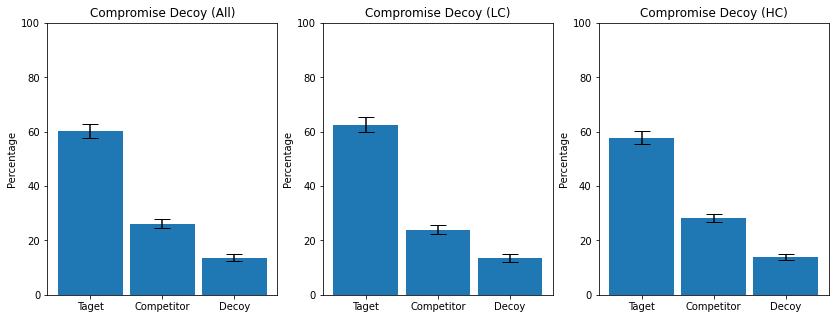

In [29]:
com_decoy_mean_perc = np.array([target_C_mean, competitor_C_mean, decoy_C_mean])
com_decoy_sems = np.array([target_C_sem, competitor_C_sem, decoy_C_sem])

com_decoy_mean_perc_LC = np.array([target_C_LowC_mean, competitor_C_LowC_mean, decoy_C_LowC_mean])
com_decoy_sems_LC = np.array([target_C_LowC_sem, competitor_C_LowC_sem, decoy_C_LowC_sem])

com_decoy_mean_perc_HC = np.array([target_C_HighC_mean, competitor_C_HighC_mean, decoy_C_HighC_mean])
com_decoy_sems_HC = np.array([target_C_HighC_sem, competitor_C_HighC_sem, decoy_C_HighC_sem])

barGraphDecoys3(com_decoy_mean_perc, com_decoy_sems, 'Compromise Decoy (All)', com_decoy_mean_perc_LC, com_decoy_sems_LC, 'Compromise Decoy (LC)', com_decoy_mean_perc_HC, com_decoy_sems_HC, 'Compromise Decoy (HC)')


In [30]:
group_com_freq_df.head(40)

,PID,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
0,40781,16,2,2,80.0,10.0,10.0
1,40447,8,9,3,40.0,45.0,15.0
2,34796,13,5,2,65.0,25.0,10.0
3,33898,12,5,3,60.0,25.0,15.0
4,37993,2,9,9,10.0,45.0,45.0
5,39056,11,5,4,55.0,25.0,20.0
6,33553,4,8,8,20.0,40.0,40.0
7,41241,8,8,4,40.0,40.0,20.0
8,41067,14,4,2,70.0,20.0,10.0
9,36391,10,6,4,50.0,30.0,20.0


## Attraction Decoy

In [31]:
decoy_A_df = all_responses[all_responses["Decoy"] == "A"]
decoy_A_df_LowC = decoy_A_df[decoy_A_df["CouplingCondition"] == "Low coupling"]
decoy_A_df_HighC = decoy_A_df[decoy_A_df["CouplingCondition"] == "High coupling"]

decoy_A_df = decoy_A_df.reset_index()
decoy_A_df_LowC = decoy_A_df_LowC.reset_index()
decoy_A_df_HighC = decoy_A_df_HighC.reset_index()

group_att_freq_df = partFreq_Decoy(decoy_A_df, "Att_Decoy")
group_att_freq_df_LowC = partFreq_Decoy(decoy_A_df_LowC, "Att_Decoy")
group_att_freq_df_HighC = partFreq_Decoy(decoy_A_df_HighC, "Att_Decoy")

# Get mean, std, and sem for all participatns.
target_A_mean, target_A_std, target_A_sem = get_decoy_stats(group_att_freq_df, "Target(%)", total_n)
competitor_A_mean, competitor_A_std, competitor_A_sem = get_decoy_stats(group_att_freq_df, "Competitor(%)", total_n)
decoy_A_mean, decoy_A_std, decoy_A_sem = get_decoy_stats(group_att_freq_df, "Att_Decoy(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_A_LowC_mean, target_A_LowC_std, target_A_LowC_sem = get_decoy_stats(group_att_freq_df_LowC, "Target(%)", number_of_low_coupling)
competitor_A_LowC_mean, competitor_A_LowC_std, competitor_A_LowC_sem = get_decoy_stats(group_att_freq_df_LowC, "Competitor(%)", number_of_low_coupling)
decoy_A_LowC_mean, decoy_A_LowC_std, decoy_A_LowC_sem = get_decoy_stats(group_att_freq_df_LowC, "Att_Decoy(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_A_HighC_mean, target_A_HighC_std, target_A_HighC_sem = get_decoy_stats(group_att_freq_df_HighC, "Target(%)", number_of_high_coupling)
competitor_A_HighC_mean, competitor_A_HighC_std, competitor_A_HighC_sem = get_decoy_stats(group_att_freq_df_HighC, "Competitor(%)", number_of_high_coupling)
decoy_A_HighC_mean, decoy_A_HighC_std, decoy_A_HighC_sem = get_decoy_stats(group_att_freq_df_HighC, "Att_Decoy(%)", number_of_high_coupling)

# Show info for all groups.
Att_summary_df = pd.DataFrame({'Target mean(%)': [target_A_mean, target_A_LowC_mean, target_A_HighC_mean],
                  'Target sem(%)': [target_A_sem, target_A_LowC_sem, target_A_HighC_sem],
                  'Comp mean(%)': [competitor_A_mean, competitor_A_LowC_mean, competitor_A_HighC_mean],
                  'Comp sem(%)': [competitor_A_sem, competitor_A_LowC_sem, competitor_A_HighC_sem],
                  'Decoy mean(%)': [decoy_A_mean, decoy_A_LowC_mean, decoy_A_HighC_mean],
                  'Decoy sem(%)': [decoy_A_sem, decoy_A_LowC_sem, decoy_A_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

Att_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
All,60.00,1.79,31.02,1.58,8.98,1.09
LowCoupling,62.04,1.90,30.37,1.58,7.59,1.03
HighCoupling,57.96,1.72,31.67,1.65,10.37,1.17


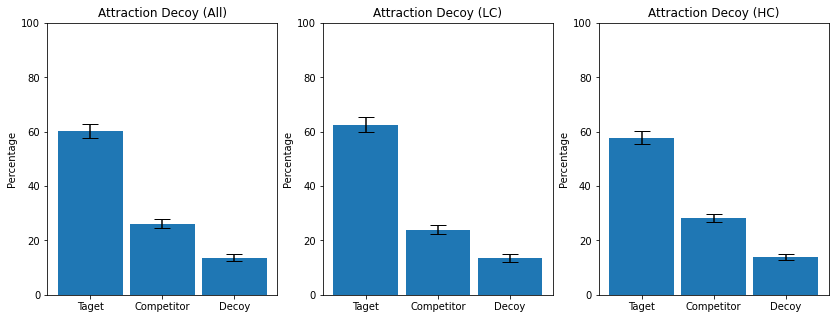

In [32]:
att_decoy_mean_perc = np.array([target_A_mean, competitor_A_mean, decoy_A_mean])
att_decoy_sems = np.array([target_A_sem, competitor_A_sem, decoy_A_sem])

att_decoy_mean_perc_LC = np.array([target_A_LowC_mean, competitor_A_LowC_mean, decoy_A_LowC_mean])
att_decoy_sems_LC = np.array([target_A_LowC_sem, competitor_A_LowC_sem, decoy_A_LowC_sem])

att_decoy_mean_perc_HC = np.array([target_A_HighC_mean, competitor_A_HighC_mean, decoy_A_HighC_mean])
att_decoy_sems_HC = np.array([target_A_HighC_sem, competitor_A_HighC_sem, decoy_A_HighC_sem])

barGraphDecoys3(com_decoy_mean_perc, com_decoy_sems, 'Attraction Decoy (All)', com_decoy_mean_perc_LC, com_decoy_sems_LC, 'Attraction Decoy (LC)', com_decoy_mean_perc_HC, com_decoy_sems_HC, 'Attraction Decoy (HC)')

In [33]:
group_att_freq_df.head(40)

,PID,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
0,40781,13,6,1,65.0,30.0,5.0
1,40447,10,8,2,50.0,40.0,10.0
2,34796,11,7,2,55.0,35.0,10.0
3,33898,10,6,4,50.0,30.0,20.0
4,37993,10,10,0,50.0,50.0,0.0
5,39056,8,7,5,40.0,35.0,25.0
6,33553,11,8,1,55.0,40.0,5.0
7,41241,14,4,2,70.0,20.0,10.0
8,41067,16,4,0,80.0,20.0,0.0
9,36391,14,5,1,70.0,25.0,5.0


## Correlation between Classic Decoys

Question: Does target_score/(target_score + competitor_score) count as normalization? Probably not.
- Does the positive correlation in between att and com, can explain the negative corr between sim-att and sim-com.
- PCA on choice frequency choice target over competitor, see if one component explain the variance.
- I'm not sure if anybody has looked at the relationship between sim, att, com, and phantom decoy. It might be
  worhwhile looking at this relationship.

In [34]:
similarity_scores_all = []
compromise_Scores_all = []
attention_scores_all = []

for x in Participants_PIDs: 
    
    similarity_scrore = group_sim_freq_df[group_sim_freq_df["PID"] == x]["Competitor(%)"]/(group_sim_freq_df[group_sim_freq_df["PID"] == x]["Competitor(%)"] + group_sim_freq_df[group_sim_freq_df["PID"] == x]["Target(%)"])
    
    compromise_score = group_com_freq_df[group_com_freq_df["PID"] == x]["Target(%)"]/(group_com_freq_df[group_com_freq_df["PID"] == x]["Target(%)"] + group_com_freq_df[group_com_freq_df["PID"] == x]["Competitor(%)"])
    
    attention_score = group_att_freq_df[group_att_freq_df["PID"] == x]["Target(%)"]/(group_att_freq_df[group_att_freq_df["PID"] == x]["Target(%)"] + group_att_freq_df[group_att_freq_df["PID"] == x]["Competitor(%)"])
    
    similarity_scores_all.append(similarity_scrore)
    
    compromise_Scores_all.append(compromise_score)
    
    attention_scores_all.append(attention_score)
    
similarity_scores_all = np.array(similarity_scores_all)
compromise_Scores_all = np.array(compromise_Scores_all)
attention_scores_all = np.array(attention_scores_all)

all_classic_decoys_df = pd.DataFrame(data={'Similarity': similarity_scores_all.flatten(),
                  'Compromise': compromise_Scores_all.flatten(),
                  'Attraction': attention_scores_all.flatten()}, index=range(total_n))

all_classic_decoys_df.head()


,Similarity,Compromise,Attraction
0,0.142857,0.888889,0.684211
1,0.500000,0.470588,0.555556
2,0.294118,0.722222,0.611111
3,0.307692,0.705882,0.625000
4,0.846154,0.181818,0.500000


In [35]:
import scipy.stats as stats

corr_sim_com = stats.pearsonr(all_classic_decoys_df["Similarity"], all_classic_decoys_df["Compromise"])
corr_sim_att = stats.pearsonr(all_classic_decoys_df["Similarity"], all_classic_decoys_df["Attraction"])
corr_att_com = stats.pearsonr(all_classic_decoys_df["Attraction"], all_classic_decoys_df["Compromise"])

print("Correlation coefficient similarity-compromise: " + str(round(corr_sim_com[0], 2)) + ", p-value: " + str(corr_sim_com[1]))
print("Correlation coefficient similarity-attention: " + str(round(corr_sim_att[0], 2)) + ", p-value: " + str(corr_sim_att[1]))
print("Correlation coefficient attraction-compromise: " + str(round(corr_att_com[0], 2)) + ", p-value: " + str(corr_att_com[1]))


Correlation coefficient similarity-compromise: -0.65, p-value: 1.031022705940966e-07
Correlation coefficient similarity-attention: -0.48, p-value: 0.0002498099591226323
Correlation coefficient attraction-compromise: 0.56, p-value: 1.0351945625464735e-05


Text(0.5, 1.0, 'Compromise vs. Attraction')

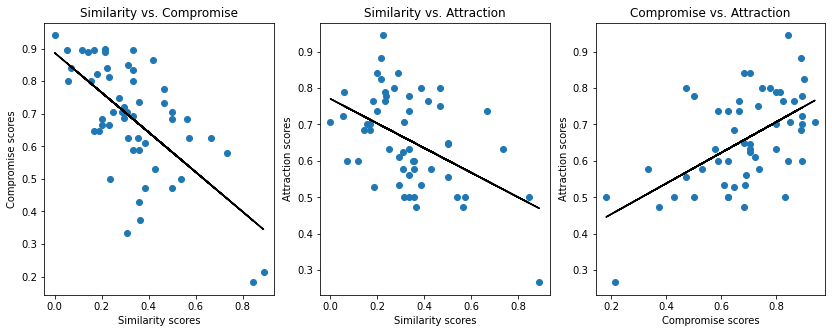

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].scatter(similarity_scores_all, compromise_Scores_all)
a_0, b_0 = np.polyfit(similarity_scores_all.flatten(), compromise_Scores_all.flatten(), 1)
ax[0].plot(similarity_scores_all, a_0*similarity_scores_all+b_0, color='black')  
ax[0].set_xlabel("Similarity scores")
ax[0].set_ylabel("Compromise scores")
ax[0].set_title("Similarity vs. Compromise")

ax[1].scatter(similarity_scores_all, attention_scores_all)
a_1, b_1 = np.polyfit(similarity_scores_all.flatten(), attention_scores_all.flatten(), 1)
ax[1].plot(similarity_scores_all, a_1*similarity_scores_all+b_1, color='black')  
ax[1].set_xlabel("Similarity scores")
ax[1].set_ylabel("Attraction scores")
ax[1].set_title("Similarity vs. Attraction")

ax[2].scatter(compromise_Scores_all, attention_scores_all)
a_2, b_2 = np.polyfit(compromise_Scores_all.flatten(), attention_scores_all.flatten(), 1)
ax[2].plot(compromise_Scores_all, a_2*compromise_Scores_all+b_2, color='black')  
ax[2].set_xlabel("Compromise scores")
ax[2].set_ylabel("Attraction scores")
ax[2].set_title("Compromise vs. Attraction")


## Mediation Analysis on Classical Decoys

In [37]:
# Does the positive correlation in between att and com, can explain the negative corr between sim-att and sim-com.
# So probably, does "sim" mediate the relationship between att-com?

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.genmod.families.links as links
from sklearn.metrics import mean_squared_error, r2_score
from pingouin import mediation_analysis


In [38]:
# Does Similarity mediate the relationship between Attention-Compromise?

mediation_analysis(data=all_classic_decoys_df, x='Attraction', m='Similarity', y='Compromise', 
                   alpha=0.05, n_boot=100)

# Pass figure with all decoys. 
# Make google slides with figures.

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Similarity ~ X,-0.678384,0.172495,2.498100e-04,-1.024521,-0.332248,Yes
1,Y ~ Similarity,-0.610602,0.098939,1.031023e-07,-0.809138,-0.412066,Yes
2,Total,0.746031,0.152777,1.035195e-05,0.439461,1.052601,Yes
3,Direct,0.430500,0.149538,5.819008e-03,0.130289,0.730711,Yes
4,Indirect,0.315531,0.119560,0.000000e+00,0.157138,0.615770,Yes


In [39]:
# Does Similarity mediate the relationship between Attention-Compromise? (Normalized data).

#mediation_analysis(data=all_decoys_norm_df, x='Attention_norm', m='Similarity_norm', y='Compromise_norm', 
#                   alpha=0.05, n_boot=100)


## PCA Analysis on Classical Decoys

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(all_classic_decoys_df)

pca.explained_variance_ratio_


array([0.73686836, 0.15121323])

In [41]:
pca.components_

array([[ 0.67928549, -0.63357273, -0.37034689],
       [ 0.71124624,  0.4440146 ,  0.54495855]])

In [42]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=5)

svd.fit(all_classic_decoys_df)

svd.explained_variance_ratio_


array([0.27783883, 0.6102427 ])

## Phantom Decoys

### Highly Desirable Group

In [43]:
# Phantom Decoy: Highly Desirable
decoy_P_df = all_responses[all_responses["Decoy"] == "P"]

decoy_P_HD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"]
decoy_P_HD_df_LowC = decoy_P_HD_df[decoy_P_HD_df["CouplingCondition"] == "Low coupling"]
decoy_P_HD_df_HighC = decoy_P_HD_df[decoy_P_HD_df["CouplingCondition"] == "High coupling"]

decoy_P_HD_df = decoy_P_HD_df.reset_index()
decoy_P_HD_df_LowC = decoy_P_HD_df_LowC.reset_index()
decoy_P_HD_df_HighC = decoy_P_HD_df_HighC.reset_index()

total_n = decoy_P_HD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_HD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_HD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_HD_freq_df = partFreq_PhantomDecoy(decoy_P_HD_df)
decoy_P_HD_LowC_freq_df = partFreq_PhantomDecoy(decoy_P_HD_df_LowC)
decoy_P_HD_HighC_freq_df = partFreq_PhantomDecoy(decoy_P_HD_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_HD_mean, target_P_HD_std, target_P_HD_sem = get_decoy_stats(decoy_P_HD_freq_df, "Target(%)", total_n)
competitor_P_HD_mean, competitor_P_HD_std, competitor_P_HD_sem = get_decoy_stats(decoy_P_HD_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_HD_LowC_mean, target_P_HD_LowC_std, target_P_HD_LowC_sem = get_decoy_stats(decoy_P_HD_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_HD_LowC_mean, competitor_P_HD_LowC_std, competitor_P_HD_LowC_sem = get_decoy_stats(decoy_P_HD_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_HD_HighC_mean, target_P_HD_HighC_std, target_P_HD_HighC_sem = get_decoy_stats(decoy_P_HD_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_HD_HighC_mean, competitor_P_HD_HighC_std, competitor_P_HD_HighC_sem = get_decoy_stats(decoy_P_HD_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_HD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_HD_mean, target_P_HD_LowC_mean, target_P_HD_HighC_mean],
                  'Target sem(%)': [target_P_HD_sem, target_P_HD_LowC_sem, target_P_HD_HighC_sem],
                  'Comp mean(%)': [competitor_P_HD_mean, competitor_P_HD_LowC_mean, competitor_P_HD_HighC_mean],
                  'Comp sem(%)': [competitor_P_HD_sem, competitor_P_HD_LowC_sem, competitor_P_HD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_HD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,61.33,2.10,38.67,2.10
LowCoupling,62.50,3.66,37.50,3.66
HighCoupling,60.00,1.89,40.00,1.89


### Weakly Desirable Group

In [44]:
# Phantom Decoy: Weakly Desirable
decoy_P_WD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"]
decoy_P_WD_df_LowC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "Low coupling"]
decoy_P_WD_df_HighC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "High coupling"]

decoy_P_WD_df = decoy_P_WD_df.reset_index()
decoy_P_WD_df_LowC = decoy_P_WD_df_LowC.reset_index()
decoy_P_WD_df_HighC = decoy_P_WD_df_HighC.reset_index()

total_n = decoy_P_WD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_WD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_WD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_WD_freq_df = partFreq_PhantomDecoy(decoy_P_WD_df)
decoy_P_WD_LowC_freq_df = partFreq_PhantomDecoy(decoy_P_WD_df_LowC)
decoy_P_WD_HighC_freq_df = partFreq_PhantomDecoy(decoy_P_WD_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_WD_mean, target_P_WD_std, target_P_WD_sem = get_decoy_stats(decoy_P_WD_freq_df, "Target(%)", total_n)
competitor_P_WD_mean, competitor_P_WD_std, competitor_P_WD_sem = get_decoy_stats(decoy_P_WD_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_WD_LowC_mean, target_P_WD_LowC_std, target_P_WD_LowC_sem = get_decoy_stats(decoy_P_WD_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_WD_LowC_mean, competitor_P_WD_LowC_std, competitor_P_WD_LowC_sem = get_decoy_stats(decoy_P_WD_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_WD_HighC_mean, target_P_WD_HighC_std, target_P_WD_HighC_sem = get_decoy_stats(decoy_P_WD_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_WD_HighC_mean, competitor_P_WD_HighC_std, competitor_P_WD_HighC_sem = get_decoy_stats(decoy_P_WD_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_WD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_WD_mean, target_P_WD_LowC_mean, target_P_WD_HighC_mean],
                  'Target sem(%)': [target_P_WD_sem, target_P_WD_LowC_sem, target_P_WD_HighC_sem],
                  'Comp mean(%)': [competitor_P_WD_mean, competitor_P_WD_LowC_mean, competitor_P_WD_HighC_mean],
                  'Comp sem(%)': [competitor_P_WD_sem, competitor_P_WD_LowC_sem, competitor_P_WD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_WD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,50.00,2.08,50.00,2.08
LowCoupling,47.50,3.13,52.50,3.13
HighCoupling,51.43,2.75,48.57,2.75


### Undesirable Group

In [45]:
# Phantom Decoy: Undesirable
decoy_P_U_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"]
decoy_P_U_df_LowC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "Low coupling"]
decoy_P_U_df_HighC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "High coupling"]

decoy_P_U_df = decoy_P_U_df.reset_index()
decoy_P_U_df_LowC = decoy_P_U_df_LowC.reset_index()
decoy_P_U_df_HighC = decoy_P_U_df_HighC.reset_index()

total_n = decoy_P_U_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_U_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_U_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_U_freq_df = partFreq_PhantomDecoy(decoy_P_U_df)
decoy_P_U_LowC_freq_df = partFreq_PhantomDecoy(decoy_P_U_df_LowC)
decoy_P_U_HighC_freq_df = partFreq_PhantomDecoy(decoy_P_U_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_U_mean, target_P_U_std, target_P_U_sem = get_decoy_stats(decoy_P_U_freq_df, "Target(%)", total_n)
competitor_P_U_mean, competitor_P_U_std, competitor_P_U_sem = get_decoy_stats(decoy_P_U_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_U_LowC_mean, target_P_U_LowC_std, target_P_U_LowC_sem = get_decoy_stats(decoy_P_U_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_U_LowC_mean, competitor_P_U_LowC_std, competitor_P_U_LowC_sem = get_decoy_stats(decoy_P_U_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_U_HighC_mean, target_P_U_HighC_std, target_P_U_HighC_sem = get_decoy_stats(decoy_P_U_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_U_HighC_mean, competitor_P_U_HighC_std, competitor_P_U_HighC_sem = get_decoy_stats(decoy_P_U_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_U_summary_df = pd.DataFrame({'Target mean(%)': [target_P_U_mean, target_P_U_LowC_mean, target_P_U_HighC_mean],
                  'Target sem(%)': [target_P_U_sem, target_P_U_LowC_sem, target_P_U_HighC_sem],
                  'Comp mean(%)': [competitor_P_U_mean, competitor_P_U_LowC_mean, competitor_P_U_HighC_mean],
                  'Comp sem(%)': [competitor_P_U_sem, competitor_P_U_LowC_sem, competitor_P_U_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_U_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,51.47,2.63,48.53,2.63
LowCoupling,50.91,3.68,49.09,3.68
HighCoupling,52.50,3.59,47.50,3.59


### Displaying All Phantoms

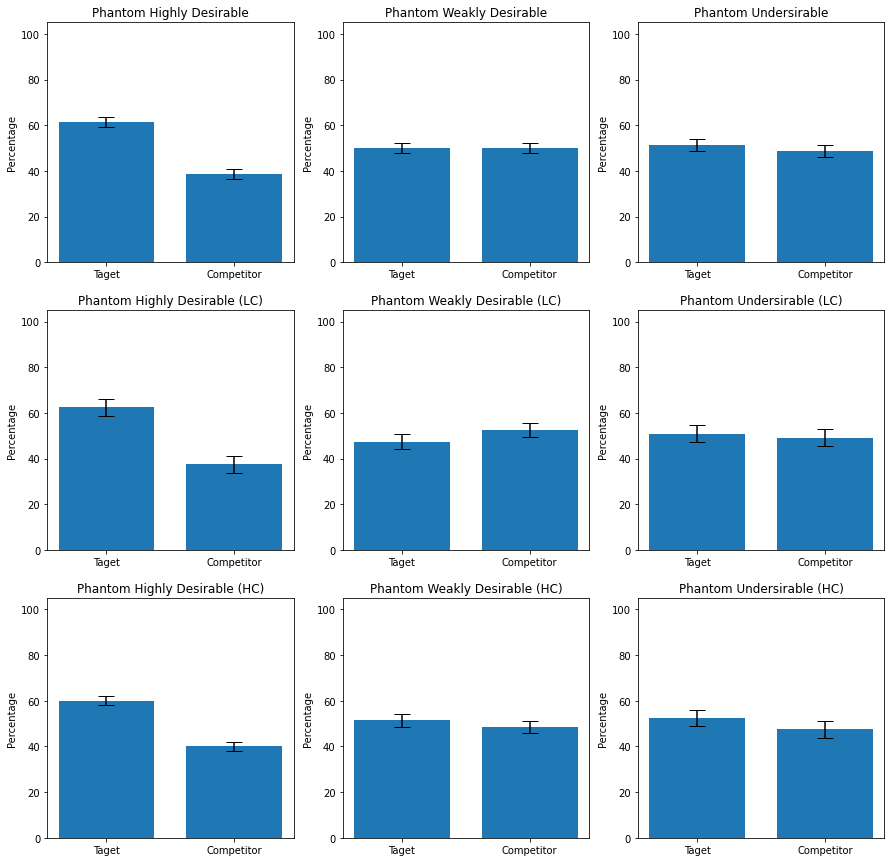

In [46]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_P_HD_mean, competitor_P_HD_mean])
y2 = np.array([target_P_WD_mean, competitor_P_WD_mean])
y3 = np.array([target_P_U_mean, competitor_P_U_mean])

error1 = np.array([target_P_HD_sem, competitor_P_HD_sem])
error2 = np.array([target_P_WD_sem, competitor_P_WD_sem])
error3 = np.array([target_P_U_sem, competitor_P_U_sem])

y1s = np.array([y1, y2, y3])
errors1 = np.array([error1, error2, error3])

ys = np.array([[[target_P_HD_mean, competitor_P_HD_mean], [target_P_WD_mean, competitor_P_WD_mean], [target_P_U_mean, competitor_P_U_mean]],
              [[target_P_HD_LowC_mean, competitor_P_HD_LowC_mean], [target_P_WD_LowC_mean, competitor_P_WD_LowC_mean], [target_P_U_LowC_mean, competitor_P_U_LowC_mean]], 
              [[target_P_HD_HighC_mean, competitor_P_HD_HighC_mean], [target_P_WD_HighC_mean, competitor_P_WD_HighC_mean], [target_P_U_HighC_mean, competitor_P_U_HighC_mean]]])

errors = np.array([[[target_P_HD_sem, competitor_P_HD_sem], [target_P_WD_sem, competitor_P_WD_sem], [target_P_U_sem, competitor_P_U_sem]],
                  [[target_P_HD_LowC_sem, competitor_P_HD_LowC_sem], [target_P_WD_LowC_sem, competitor_P_WD_LowC_sem], [target_P_U_LowC_sem, competitor_P_U_LowC_sem]],
                  [[target_P_HD_HighC_sem, competitor_P_HD_HighC_sem], [target_P_WD_HighC_sem, competitor_P_WD_HighC_sem], [target_P_U_HighC_sem, competitor_P_U_HighC_sem]]])

titles = [["Phantom Highly Desirable", "Phantom Weakly Desirable", "Phantom Undersirable"],
         ["Phantom Highly Desirable (LC)", "Phantom Weakly Desirable (LC)", "Phantom Undersirable (LC)"],
         ["Phantom Highly Desirable (HC)", "Phantom Weakly Desirable (HC)", "Phantom Undersirable (HC)"]]

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
                       
for x in range(3):
    for y in range(3):
        ax[y][x].bar(labels, ys[y][x], 0.75, yerr=errors[y][x], capsize=8)
        ax[y][x].set_ylim(0, 105)
        ax[y][x].set_ylabel('Percentage')
        ax[y][x].set_title(titles[y][x])
        
plt.show()

### Still, there appears to be too much noise with the items/stimulus. <br>So, I am running a brief check including only the items that work. 

### Highly Desirable Condition

In [47]:
decoy_P_HD_CI_df = decoy_P_HD_df.loc[(decoy_P_HD_df["Item"]=="Dehumidifier") | (decoy_P_HD_df["Item"]=="Organic fertilizer") | (decoy_P_HD_df["Item"]=="Paint sprayer") | (decoy_P_HD_df["Item"]=="Wifi extender") | (decoy_P_HD_df["Item"]=="Outdoor solar lights")] 
decoy_P_HD_df_LowC = decoy_P_HD_CI_df[decoy_P_HD_CI_df["CouplingCondition"] == "Low coupling"]
decoy_P_HD_df_HighC = decoy_P_HD_CI_df[decoy_P_HD_CI_df["CouplingCondition"] == "High coupling"]

decoy_P_HD_freq_CI_df = partFreq_PhantomDecoy(decoy_P_HD_CI_df)
decoy_P_HD_LowC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_HD_df_LowC)
decoy_P_HD_HighC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_HD_df_HighC)

total_n = decoy_P_HD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_HD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_HD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_HD_mean, target_P_HD_std, target_P_HD_sem = get_decoy_stats(decoy_P_HD_freq_CI_df, "Target(%)", total_n)
competitor_P_HD_mean, competitor_P_HD_std, competitor_P_HD_sem = get_decoy_stats(decoy_P_HD_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_HD_LowC_mean, target_P_HD_LowC_std, target_P_HD_LowC_sem = get_decoy_stats(decoy_P_HD_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_HD_LowC_mean, competitor_P_HD_LowC_std, competitor_P_HD_LowC_sem = get_decoy_stats(decoy_P_HD_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_HD_HighC_mean, target_P_HD_HighC_std, target_P_HD_HighC_sem = get_decoy_stats(decoy_P_HD_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_HD_HighC_mean, competitor_P_HD_HighC_std, competitor_P_HD_HighC_sem = get_decoy_stats(decoy_P_HD_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_HD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_HD_mean, target_P_HD_LowC_mean, target_P_HD_HighC_mean],
                  'Target sem(%)': [target_P_HD_sem, target_P_HD_LowC_sem, target_P_HD_HighC_sem],
                  'Comp mean(%)': [competitor_P_HD_mean, competitor_P_HD_LowC_mean, competitor_P_HD_HighC_mean],
                  'Comp sem(%)': [competitor_P_HD_sem, competitor_P_HD_LowC_sem, competitor_P_HD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_HD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,64.00,3.75,36.00,3.75
LowCoupling,65.00,6.55,35.00,6.55
HighCoupling,62.86,3.60,37.14,3.60


### Weakly Desirable Condition

In [48]:
decoy_P_WD_CI_df = decoy_P_WD_df.loc[(decoy_P_WD_df["Item"]=="Dehumidifier") | (decoy_P_WD_df["Item"]=="Organic fertilizer") | (decoy_P_WD_df["Item"]=="Paint sprayer") | (decoy_P_WD_df["Item"]=="Wifi extender") | (decoy_P_WD_df["Item"]=="Outdoor solar lights")]
decoy_P_WD_df_LowC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "Low coupling"]
decoy_P_WD_df_HighC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "High coupling"]

decoy_P_WD_freq_CI_df = partFreq_PhantomDecoy(decoy_P_WD_CI_df)
decoy_P_WD_LowC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_WD_df_LowC)
decoy_P_WD_HighC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_WD_df_HighC)

total_n = decoy_P_WD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_WD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_WD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_WD_mean, target_P_WD_std, target_P_WD_sem = get_decoy_stats(decoy_P_WD_freq_CI_df, "Target(%)", total_n)
competitor_P_WD_mean, competitor_P_WD_std, competitor_P_WD_sem = get_decoy_stats(decoy_P_WD_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_WD_LowC_mean, target_P_WD_LowC_std, target_P_WD_LowC_sem = get_decoy_stats(decoy_P_WD_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_WD_LowC_mean, competitor_P_WD_LowC_std, competitor_P_WD_LowC_sem = get_decoy_stats(decoy_P_WD_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_WD_HighC_mean, target_P_WD_HighC_std, target_P_WD_HighC_sem = get_decoy_stats(decoy_P_WD_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_WD_HighC_mean, competitor_P_WD_HighC_std, competitor_P_WD_HighC_sem = get_decoy_stats(decoy_P_WD_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_WD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_WD_mean, target_P_WD_LowC_mean, target_P_WD_HighC_mean],
                  'Target sem(%)': [target_P_WD_sem, target_P_WD_LowC_sem, target_P_WD_HighC_sem],
                  'Comp mean(%)': [competitor_P_WD_mean, competitor_P_WD_LowC_mean, competitor_P_WD_HighC_mean],
                  'Comp sem(%)': [competitor_P_WD_sem, competitor_P_WD_LowC_sem, competitor_P_WD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_WD_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,54.55,3.40,45.45,3.40
LowCoupling,47.50,3.13,52.50,3.13
HighCoupling,51.43,2.75,48.57,2.75


### Undesirable Condition

In [49]:
decoy_P_U_CI_df = decoy_P_U_df.loc[(decoy_P_U_df["Item"]=="Dehumidifier") | (decoy_P_U_df["Item"]=="Organic fertilizer") | (decoy_P_U_df["Item"]=="Paint sprayer") | (decoy_P_U_df["Item"]=="Wifi extender") | (decoy_P_U_df["Item"]=="Outdoor solar lights")]
decoy_P_U_df_LowC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "Low coupling"]
decoy_P_U_df_HighC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "High coupling"]

decoy_P_U_freq_CI_df = partFreq_PhantomDecoy(decoy_P_U_df)
decoy_P_U_LowC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_U_df_LowC)
decoy_P_U_HighC_freq_CI_df = partFreq_PhantomDecoy(decoy_P_U_df_HighC)

total_n = decoy_P_U_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_U_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_U_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_U_mean, target_P_U_std, target_P_U_sem = get_decoy_stats(decoy_P_U_freq_CI_df, "Target(%)", total_n)
competitor_P_U_mean, competitor_P_U_std, competitor_P_U_sem = get_decoy_stats(decoy_P_U_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_U_LowC_mean, target_P_U_LowC_std, target_P_U_LowC_sem = get_decoy_stats(decoy_P_U_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_U_LowC_mean, competitor_P_U_LowC_std, competitor_P_U_LowC_sem = get_decoy_stats(decoy_P_U_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_U_HighC_mean, target_P_U_HighC_std, target_P_U_HighC_sem = get_decoy_stats(decoy_P_U_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_U_HighC_mean, competitor_P_U_HighC_std, competitor_P_U_HighC_sem = get_decoy_stats(decoy_P_U_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_U_summary_df = pd.DataFrame({'Target mean(%)': [target_P_U_mean, target_P_U_LowC_mean, target_P_U_HighC_mean],
                  'Target sem(%)': [target_P_U_sem, target_P_U_LowC_sem, target_P_U_HighC_sem],
                  'Comp mean(%)': [competitor_P_U_mean, competitor_P_U_LowC_mean, competitor_P_U_HighC_mean],
                  'Comp sem(%)': [competitor_P_U_sem, competitor_P_U_LowC_sem, competitor_P_U_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_U_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,51.47,2.63,48.53,2.63
LowCoupling,50.91,3.68,49.09,3.68
HighCoupling,52.50,3.59,47.50,3.59


### All phantoms

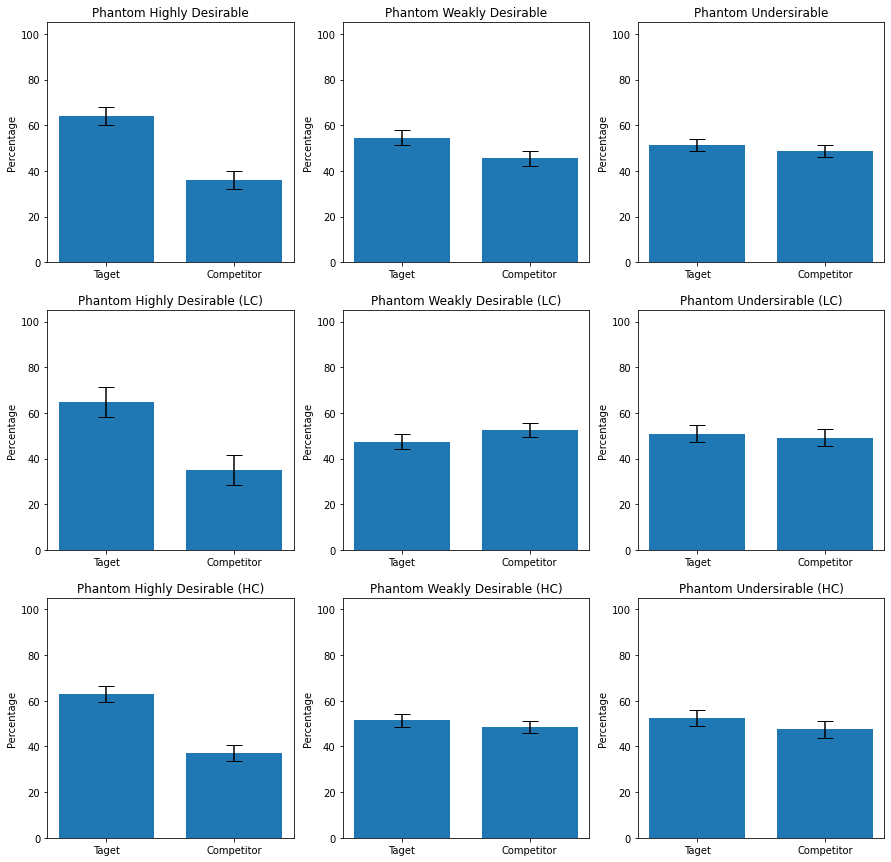

In [50]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_P_HD_mean, competitor_P_HD_mean])
y2 = np.array([target_P_WD_mean, competitor_P_WD_mean])
y3 = np.array([target_P_U_mean, competitor_P_U_mean])

error1 = np.array([target_P_HD_sem, competitor_P_HD_sem])
error2 = np.array([target_P_WD_sem, competitor_P_WD_sem])
error3 = np.array([target_P_U_sem, competitor_P_U_sem])

y1s = np.array([y1, y2, y3])
errors1 = np.array([error1, error2, error3])

ys = np.array([[[target_P_HD_mean, competitor_P_HD_mean], [target_P_WD_mean, competitor_P_WD_mean], [target_P_U_mean, competitor_P_U_mean]],
              [[target_P_HD_LowC_mean, competitor_P_HD_LowC_mean], [target_P_WD_LowC_mean, competitor_P_WD_LowC_mean], [target_P_U_LowC_mean, competitor_P_U_LowC_mean]], 
              [[target_P_HD_HighC_mean, competitor_P_HD_HighC_mean], [target_P_WD_HighC_mean, competitor_P_WD_HighC_mean], [target_P_U_HighC_mean, competitor_P_U_HighC_mean]]])

errors = np.array([[[target_P_HD_sem, competitor_P_HD_sem], [target_P_WD_sem, competitor_P_WD_sem], [target_P_U_sem, competitor_P_U_sem]],
                  [[target_P_HD_LowC_sem, competitor_P_HD_LowC_sem], [target_P_WD_LowC_sem, competitor_P_WD_LowC_sem], [target_P_U_LowC_sem, competitor_P_U_LowC_sem]],
                  [[target_P_HD_HighC_sem, competitor_P_HD_HighC_sem], [target_P_WD_HighC_sem, competitor_P_WD_HighC_sem], [target_P_U_HighC_sem, competitor_P_U_HighC_sem]]])

titles = [["Phantom Highly Desirable", "Phantom Weakly Desirable", "Phantom Undersirable"],
         ["Phantom Highly Desirable (LC)", "Phantom Weakly Desirable (LC)", "Phantom Undersirable (LC)"],
         ["Phantom Highly Desirable (HC)", "Phantom Weakly Desirable (HC)", "Phantom Undersirable (HC)"]]

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
                       
for x in range(3):
    for y in range(3):
        ax[y][x].bar(labels, ys[y][x], 0.75, yerr=errors[y][x], capsize=8)
        ax[y][x].set_ylim(0, 105)
        ax[y][x].set_ylabel('Percentage')
        ax[y][x].set_title(titles[y][x])
        
plt.show()

## Inspecting Individual Items

### Similarity Decoy

In [51]:
decoy_S_TargetA_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_A') | decoy_S_df['Option_2'].str.contains('S_A') | decoy_S_df['Option_3'].str.contains('S_A')]
decoy_S_TargetB_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_B') | decoy_S_df['Option_2'].str.contains('S_B') | decoy_S_df['Option_3'].str.contains('S_B')]

decoy_S_Items_TargetA_df = itemFreq_Decoy(decoy_S_TargetA_df, "Sim_Decoy")
decoy_S_Items_TargetB_df = itemFreq_Decoy(decoy_S_TargetB_df, "Sim_Decoy")

item_list = decoy_S_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Sim_items_targets_A = np.array([])
Sim_items_competitors_A = np.array([])
Sim_items_decoys_A = np.array([])

Sim_items_targets_B = np.array([])
Sim_items_competitors_B = np.array([])
Sim_items_decoys_B = np.array([])

Sim_items_targets_A_sem = np.array([])
Sim_items_competitors_A_sem = np.array([])
Sim_items_decoys_A_sem = np.array([])

Sim_items_targets_B_sem = np.array([])
Sim_items_competitors_B_sem = np.array([])
Sim_items_decoys_B_sem = np.array([])

for item in item_list:
    
    current_item_A = decoy_S_Items_TargetA_df[decoy_S_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_S_Items_TargetB_df[decoy_S_Items_TargetB_df["Item"] == item]
    
    Sim_items_targets_A = np.append(Sim_items_targets_A, current_item_A["Target(%)"])
    Sim_items_competitors_A = np.append(Sim_items_competitors_A, current_item_A["Competitor(%)"])
    Sim_items_decoys_A = np.append(Sim_items_decoys_A, current_item_A["Sim_Decoy(%)"])
    
    Sim_items_targets_B = np.append(Sim_items_targets_B, current_item_B["Target(%)"])
    Sim_items_competitors_B = np.append(Sim_items_competitors_B, current_item_B["Competitor(%)"])
    Sim_items_decoys_B = np.append(Sim_items_decoys_B, current_item_B["Sim_Decoy(%)"])
    
    target_P_WD_std = decoy_P_WD_freq_df["Target(%)"].std()
    competitor_P_WD_std = decoy_P_WD_freq_df["Competitor(%)"].std()

    target_P_WD_sem = round((target_P_WD_std/np.sqrt(total_n)), 2)
    competitor_P_WD_sem = round((competitor_P_WD_std/np.sqrt(total_n)), 2)
    

In [52]:
decoy_S_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
decoy_S_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,Air Fryer Oven,40,7,7,74.1,13.0,13.0
9,Air mattress,24,15,15,44.4,27.8,27.8
7,Baby high chair,17,33,4,31.5,61.1,7.4
8,Headlight bulbs,25,11,18,46.3,20.4,33.3
3,Metal detector,12,38,4,22.2,70.4,7.4
6,Night light,33,10,11,61.1,18.5,20.4
4,Odor neutralizer,28,13,13,51.9,24.1,24.1
2,Pressure washer,32,15,7,59.3,27.8,13.0
5,Security camera,33,13,8,61.1,24.1,14.8
1,Vacuum,30,10,14,55.6,18.5,25.9


In [53]:
decoy_S_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
decoy_S_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
9,Air Fryer Oven,22,17,15,40.7,31.5,27.8
2,Air mattress,25,9,20,46.3,16.7,37.0
0,Baby high chair,12,6,36,22.2,11.1,66.7
3,Headlight bulbs,31,6,17,57.4,11.1,31.5
6,Metal detector,31,1,22,57.4,1.9,40.7
5,Night light,25,19,10,46.3,35.2,18.5
4,Odor neutralizer,32,8,14,59.3,14.8,25.9
8,Pressure washer,29,5,20,53.7,9.3,37.0
1,Security camera,33,7,14,61.1,13.0,25.9
7,Vacuum,9,9,36,16.7,16.7,66.7


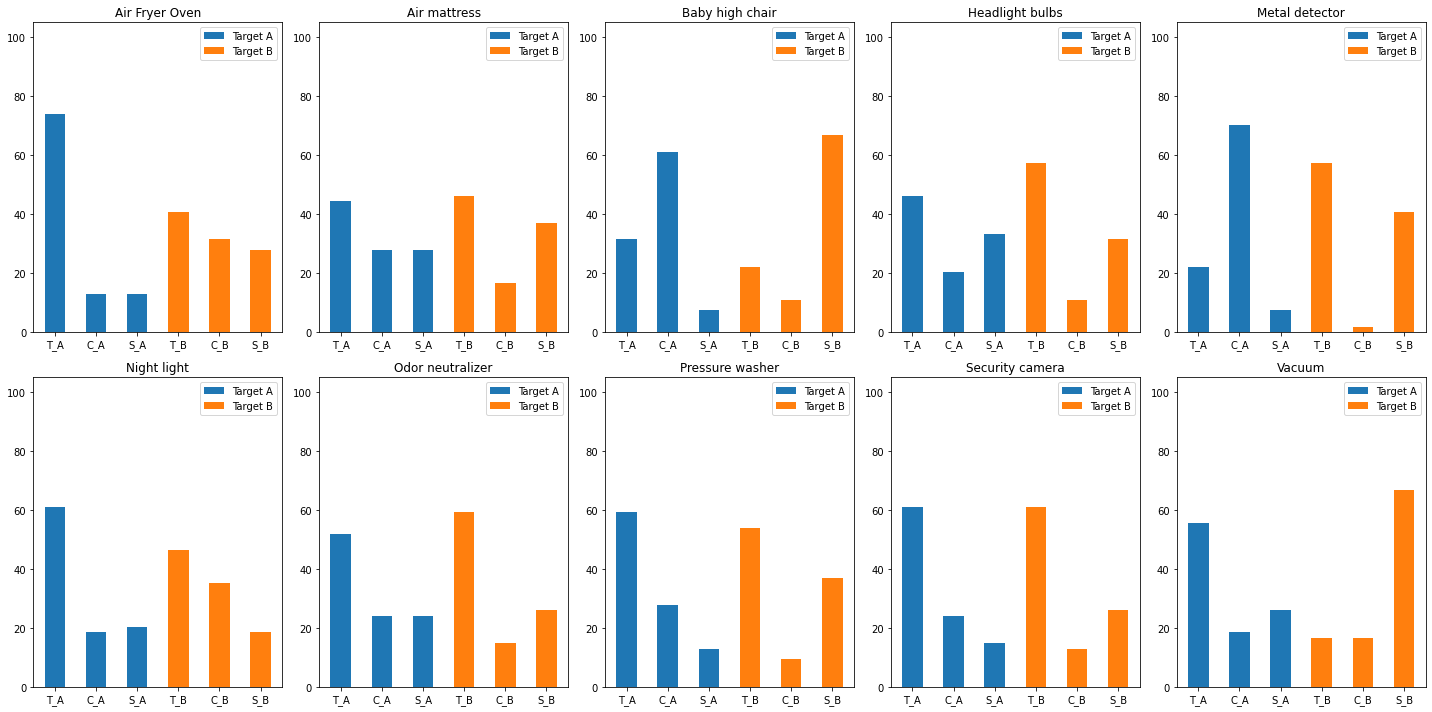

In [54]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "S_A"]
labels2 = ["T_B", "C_B", "S_B"]

n = Sim_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Sim_items_targets_A[counter], Sim_items_competitors_A[counter], Sim_items_decoys_A[counter]])
        y2 = np.array([Sim_items_targets_B[counter], Sim_items_competitors_B[counter], Sim_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Compromise Decoy

In [55]:
decoy_C_TargetA_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_A') | decoy_C_df['Option_2'].str.contains('C_A') | decoy_C_df['Option_3'].str.contains('C_A')]
decoy_C_TargetB_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_B') | decoy_C_df['Option_2'].str.contains('C_B') | decoy_C_df['Option_3'].str.contains('C_B')]

decoy_C_Items_TargetA_df = itemFreq_Decoy(decoy_C_TargetA_df, "Com_Decoy")
decoy_C_Items_TargetB_df = itemFreq_Decoy(decoy_C_TargetB_df, "Com_Decoy")

item_list = decoy_C_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Com_items_targets_A = np.array([])
Com_items_competitors_A = np.array([])
Com_items_decoys_A = np.array([])

Com_items_targets_B = np.array([])
Com_items_competitors_B = np.array([])
Com_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_C_Items_TargetB_df[decoy_C_Items_TargetB_df["Item"] == item]
    
    Com_items_targets_A = np.append(Com_items_targets_A, current_item_A["Target(%)"])
    Com_items_competitors_A = np.append(Com_items_competitors_A, current_item_A["Competitor(%)"])
    Com_items_decoys_A = np.append(Com_items_decoys_A, current_item_A["Com_Decoy(%)"])
    
    Com_items_targets_B = np.append(Com_items_targets_B, current_item_B["Target(%)"])
    Com_items_competitors_B = np.append(Com_items_competitors_B, current_item_B["Competitor(%)"])
    Com_items_decoys_B = np.append(Com_items_decoys_B, current_item_B["Com_Decoy(%)"])


In [56]:
decoy_C_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
decoy_C_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
0,Baby crib,37,8,9,68.5,14.8,16.7
2,Car vacuum,35,16,3,64.8,29.6,5.6
6,Insect repellent,28,25,1,51.9,46.3,1.9
9,Lawn mower,32,13,9,59.3,24.1,16.7
3,Mobility scooter,21,31,2,38.9,57.4,3.7
5,Pesticide,32,18,4,59.3,33.3,7.4
7,Puree machine,43,7,4,79.6,13.0,7.4
8,Smart lock,11,42,1,20.4,77.8,1.9
1,Water heater,43,9,2,79.6,16.7,3.7
4,White noise machine,33,17,4,61.1,31.5,7.4


In [57]:
decoy_C_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
decoy_C_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Com_Decoy(num),Target(%),Competitor(%),Com_Decoy(%)
6,Baby crib,28,16,10,51.9,29.6,18.5
8,Car vacuum,33,10,11,61.1,18.5,20.4
4,Insect repellent,42,8,4,77.8,14.8,7.4
1,Lawn mower,32,16,6,59.3,29.6,11.1
9,Mobility scooter,18,7,29,33.3,13.0,53.7
2,Pesticide,37,14,3,68.5,25.9,5.6
3,Puree machine,41,8,5,75.9,14.8,9.3
0,Smart lock,30,5,19,55.6,9.3,35.2
7,Water heater,41,11,2,75.9,20.4,3.7
5,White noise machine,33,1,20,61.1,1.9,37.0


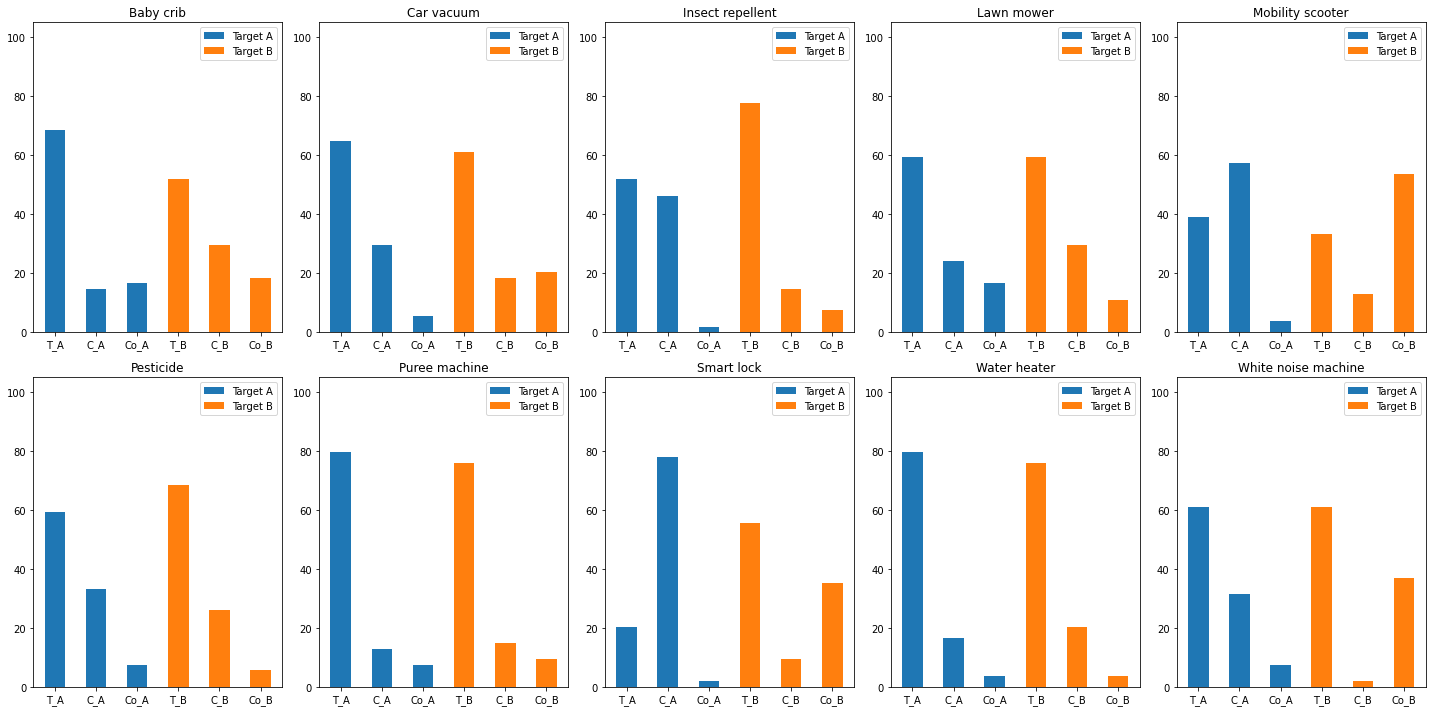

In [58]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "Co_A"]
labels2 = ["T_B", "C_B", "Co_B"]

n = Com_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Com_items_targets_A[counter], Com_items_competitors_A[counter], Com_items_decoys_A[counter]])
        y2 = np.array([Com_items_targets_B[counter], Com_items_competitors_B[counter], Com_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Attention Decoy

In [59]:
decoy_A_TargetA_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_A') | decoy_A_df['Option_2'].str.contains('A_A') | decoy_A_df['Option_3'].str.contains('A_A')]
decoy_A_TargetB_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_B') | decoy_A_df['Option_2'].str.contains('A_B') | decoy_A_df['Option_3'].str.contains('A_B')]

decoy_A_Items_TargetA_df = itemFreq_Decoy(decoy_A_TargetA_df, "Att_Decoy")
decoy_A_Items_TargetB_df = itemFreq_Decoy(decoy_A_TargetB_df, "Att_Decoy")

item_list = decoy_A_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Att_items_targets_A = np.array([])
Att_items_competitors_A = np.array([])
Att_items_decoys_A = np.array([])

Att_items_targets_B = np.array([])
Att_items_competitors_B = np.array([])
Att_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_A_Items_TargetB_df[decoy_A_Items_TargetB_df["Item"] == item]
    
    Att_items_targets_A = np.append(Att_items_targets_A, current_item_A["Target(%)"])
    Att_items_competitors_A = np.append(Att_items_competitors_A, current_item_A["Competitor(%)"])
    Att_items_decoys_A = np.append(Att_items_decoys_A, current_item_A["Att_Decoy(%)"])
    
    Att_items_targets_B = np.append(Att_items_targets_B, current_item_B["Target(%)"])
    Att_items_competitors_B = np.append(Att_items_competitors_B, current_item_B["Competitor(%)"])
    Att_items_decoys_B = np.append(Att_items_decoys_B, current_item_B["Att_Decoy(%)"])


In [60]:
decoy_A_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
decoy_A_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
5,Car seat,44,5,5,81.5,9.3,9.3
8,Cloth diapers,28,21,5,51.9,38.9,9.3
4,Clothes Steamer,32,11,11,59.3,20.4,20.4
7,Leaf Blower,47,4,3,87.0,7.4,5.6
2,Rash cream,17,35,2,31.5,64.8,3.7
1,Slow cooker,18,33,3,33.3,61.1,5.6
0,Smart bulb,39,10,5,72.2,18.5,9.3
3,Tire inflator,26,25,3,48.1,46.3,5.6
9,UV lamp,33,18,3,61.1,33.3,5.6
6,Walker with seat,32,14,8,59.3,25.9,14.8


In [61]:
decoy_A_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
decoy_A_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Att_Decoy(num),Target(%),Competitor(%),Att_Decoy(%)
9,Car seat,13,33,8,24.1,61.1,14.8
1,Cloth diapers,39,9,6,72.2,16.7,11.1
5,Clothes Steamer,36,13,5,66.7,24.1,9.3
0,Leaf Blower,6,41,7,11.1,75.9,13.0
7,Rash cream,46,3,5,85.2,5.6,9.3
8,Slow cooker,49,1,4,90.7,1.9,7.4
6,Smart bulb,28,21,5,51.9,38.9,9.3
4,Tire inflator,47,7,0,87.0,13.0,0.0
3,UV lamp,36,14,4,66.7,25.9,7.4
2,Walker with seat,32,17,5,59.3,31.5,9.3


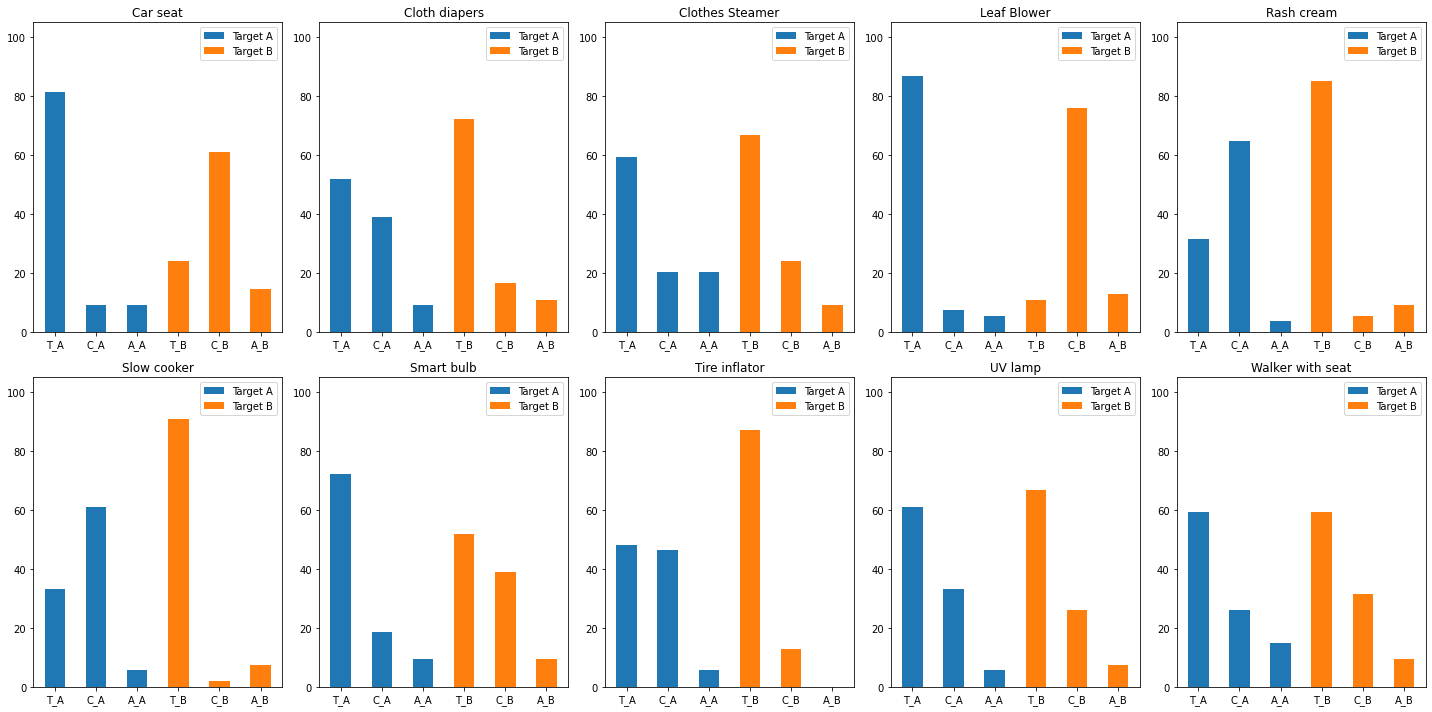

In [62]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A", "A_A"]
labels2 = ["T_B", "C_B", "A_B"]

n = Att_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Att_items_targets_A[counter], Att_items_competitors_A[counter], Att_items_decoys_A[counter]])
        y2 = np.array([Att_items_targets_B[counter], Att_items_competitors_B[counter], Att_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

### Phantom Decoy

In [63]:
decoy_P_TargetA_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_A') | decoy_P_df['Option_2'].str.contains('P_A') | decoy_P_df['Option_3'].str.contains('P_A')]
decoy_P_TargetB_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_B') | decoy_P_df['Option_2'].str.contains('P_B') | decoy_P_df['Option_3'].str.contains('P_B')]

# Only looking at "Weakly_desirable" condition, as it is sort of a control group.
decoy_P_TargetA_df = decoy_P_TargetA_df[decoy_P_TargetA_df["PhantomCondition"] == "Weakly_desirable"]
decoy_P_TargetB_df = decoy_P_TargetB_df[decoy_P_TargetB_df["PhantomCondition"] == "Weakly_desirable"]

decoy_P_Items_TargetA_df = itemFreq_PhantomDecoy(decoy_P_TargetA_df)
decoy_P_Items_TargetB_df = itemFreq_PhantomDecoy(decoy_P_TargetB_df)

item_list = decoy_P_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Phan_items_targets_A = np.array([])
Phan_items_competitors_A = np.array([])

Phan_items_targets_B = np.array([])
Phan_items_competitors_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_P_Items_TargetA_df[decoy_P_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_P_Items_TargetB_df[decoy_P_Items_TargetB_df["Item"] == item]
    
    Phan_items_targets_A = np.append(Phan_items_targets_A, current_item_A["Target(%)"])
    Phan_items_competitors_A = np.append(Phan_items_competitors_A, current_item_A["Competitor(%)"])
    
    Phan_items_targets_B = np.append(Phan_items_targets_B, current_item_B["Target(%)"])
    Phan_items_competitors_B = np.append(Phan_items_competitors_B, current_item_B["Competitor(%)"])

    

In [64]:
decoy_P_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
decoy_P_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Target(%),Competitor(%)
7,Air purifier,12,10,54.5,45.5
9,Baby stroller,11,11,50.0,50.0
6,Countertop blender,6,16,27.3,72.7
5,Dehumidifier,10,12,45.5,54.5
2,Electric mop,11,11,50.0,50.0
1,Organic fertilizer,10,12,45.5,54.5
0,Outdoor solar lights,17,5,77.3,22.7
3,Paint sprayer,9,13,40.9,59.1
4,Solar panel system,17,5,77.3,22.7
8,Wifi extender,8,14,36.4,63.6


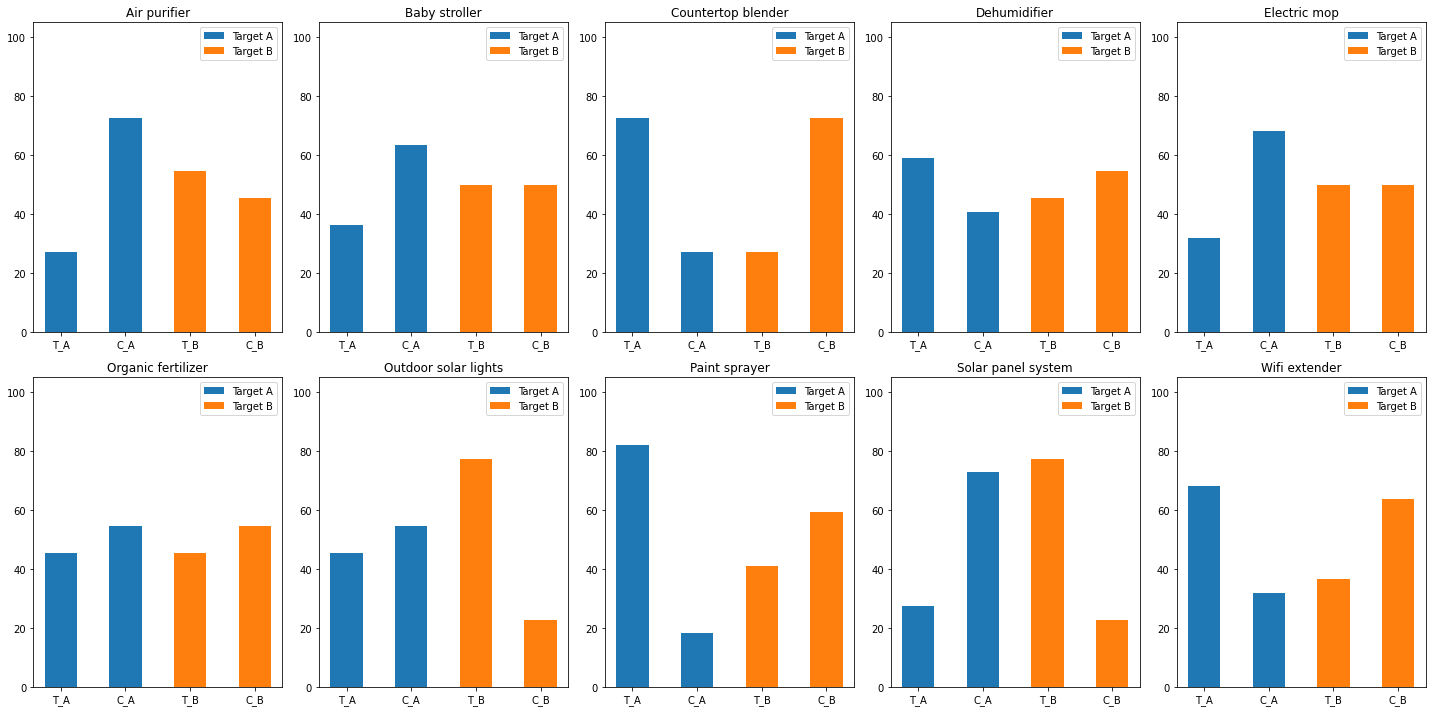

In [65]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A"]
labels2 = ["T_B", "C_B"]

n = item_list.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Phan_items_targets_A[counter], Phan_items_competitors_A[counter]])
        y2 = np.array([Phan_items_targets_B[counter], Phan_items_competitors_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

# <font color=blue>Inspecting participants who do not and do display 'Similarity Decoy' Effect</font>


In [66]:
"""
Notes on how participants are being divided: 
Y_SimDecoy -> (Competitor > Target) and (Competitor > Decoy)
N_SimDecoy -> (Target > Competitor) and (Target > Decoy)
N2 -> (Decoy > Competitor) and (Decoy > Target)
"""

group_Y_SimDecoy = group_sim_freq_df.loc[(group_sim_freq_df["Competitor(%)"] > group_sim_freq_df["Target(%)"]) & (group_sim_freq_df["Competitor(%)"] > group_sim_freq_df["Sim_Decoy(%)"])] 
group_N_SimDecoy = group_sim_freq_df.loc[(group_sim_freq_df["Competitor(%)"] < group_sim_freq_df["Target(%)"]) & (group_sim_freq_df["Target(%)"] > group_sim_freq_df["Sim_Decoy(%)"])] 
group_N2_SimDecoy = group_sim_freq_df.loc[(group_sim_freq_df["Sim_Decoy(%)"] > group_sim_freq_df["Target(%)"]) & (group_sim_freq_df["Sim_Decoy(%)"] > group_sim_freq_df["Competitor(%)"])] 

Y_SimDecoy_IDS = group_Y_SimDecoy["PID"].unique()
total_Y_SimDecoy = int(len(Y_SimDecoy_IDS))

N_SimDecoy_IDS = group_N_SimDecoy["PID"].unique()
total_N_SimDecoy = int(len(group_N_SimDecoy))

N2_SimDecoy_IDS = group_N2_SimDecoy["PID"].unique()
total_N2_SimDecoy = int(len(group_N2_SimDecoy))

print("Total number of particiants in 'group_Y_SimDecoy': " + str(total_Y_SimDecoy))
print("Total number of particiants in 'group_N_SimDecoy': " + str(total_N_SimDecoy))
print("Total number of particiants in 'group_N2_SimDecoy': " + str(total_N2_SimDecoy))


Total number of particiants in 'group_Y_SimDecoy': 5
Total number of particiants in 'group_N_SimDecoy': 40
Total number of particiants in 'group_N2_SimDecoy': 5


In [67]:
Y_SimDecoy_all = all_responses[~all_responses.Survey_ID.isin(Y_SimDecoy_IDS) == False]
N_SimDecoy_All = all_responses[~all_responses.Survey_ID.isin(N_SimDecoy_IDS) == False]
N2_SimDecoy_All = all_responses[~all_responses.Survey_ID.isin(N2_SimDecoy_IDS) == False]

Y_SimDecoy_IDS = Y_SimDecoy_all["Survey_ID"].unique()
total_Y_SimDecoy = int(len(Y_SimDecoy_IDS))

N_SimDecoy_IDS = N_SimDecoy_All["Survey_ID"].unique()
total_N_SimDecoy = int(len(group_N_SimDecoy))

N2_SimDecoy_IDS = N2_SimDecoy_All["Survey_ID"].unique()
total_N2_SimDecoy = int(len(group_N2_SimDecoy))

print("Total number of particiants in 'group_Y_SimDecoy': " + str(total_Y_SimDecoy))
print("Total number of particiants in 'group_N_SimDecoy': " + str(total_N_SimDecoy))
print("Total number of particiants in 'group_N2_SimDecoy': " + str(total_N2_SimDecoy))

Total number of particiants in 'group_Y_SimDecoy': 5
Total number of particiants in 'group_N_SimDecoy': 40
Total number of particiants in 'group_N2_SimDecoy': 5


In [68]:
# Getting info about participants coupling condition from Y_SD group.

Y_SimDecoy_LC = Y_SimDecoy_all[Y_SimDecoy_all["CouplingCondition"] == "Low coupling"]
Y_SimDecoy_HC = Y_SimDecoy_all[Y_SimDecoy_all["CouplingCondition"] == "High coupling"]

Y_SimDecoy_LC_IDS = Y_SimDecoy_LC["Survey_ID"].unique()
Y_SimDecoy_HC_IDS = Y_SimDecoy_HC["Survey_ID"].unique()

total_Y_SD_LC = int(len(Y_SimDecoy_LC_IDS))
total_Y_SD_HC = int(len(Y_SimDecoy_HC_IDS))

print("Total number of particiants in 'group_Y_SimDecoy': " + str(total_Y_SimDecoy))
print("Total number of particiants in 'group_Y_SimDecoy' with 'Low Coupling': " + str(total_Y_SD_LC))
print("Total number of particiants in 'group_Y_SimDecoy' with 'High Coupling': " + str(total_Y_SD_HC))


Total number of particiants in 'group_Y_SimDecoy': 5
Total number of particiants in 'group_Y_SimDecoy' with 'Low Coupling': 0
Total number of particiants in 'group_Y_SimDecoy' with 'High Coupling': 5


In [69]:
# Getting info about participants coupling condition from N_SD group.

N_SimDecoy_LC = N_SimDecoy_All[N_SimDecoy_All["CouplingCondition"] == "Low coupling"]
N_SimDecoy_HC = N_SimDecoy_All[N_SimDecoy_All["CouplingCondition"] == "High coupling"]

N_SimDecoy_LC_IDS = N_SimDecoy_LC["Survey_ID"].unique()
N_SimDecoy_HC_IDS = N_SimDecoy_HC["Survey_ID"].unique()

total_N_SD_LC = int(len(N_SimDecoy_LC_IDS))
total_N_SD_HC = int(len(N_SimDecoy_HC_IDS))

print("Total number of particiants in 'group_N_SimDecoy': " + str(total_N_SimDecoy))
print("Total number of particiants in 'group_N_SimDecoy' with 'Low Coupling': " + str(total_N_SD_LC))
print("Total number of particiants in 'group_N_SimDecoy' with 'High Coupling': " + str(total_N_SD_HC))


Total number of particiants in 'group_N_SimDecoy': 40
Total number of particiants in 'group_N_SimDecoy' with 'Low Coupling': 20
Total number of particiants in 'group_N_SimDecoy' with 'High Coupling': 20


In [70]:
# Getting info about participants coupling condition from N2_SD group.

N2_SimDecoy_LC = N2_SimDecoy_All[N2_SimDecoy_All["CouplingCondition"] == "Low coupling"]
N2_SimDecoy_HC = N2_SimDecoy_All[N2_SimDecoy_All["CouplingCondition"] == "High coupling"]

N2_SimDecoy_LC_IDS = N2_SimDecoy_LC["Survey_ID"].unique()
N2_SimDecoy_HC_IDS = N2_SimDecoy_HC["Survey_ID"].unique()

total_N2_SD_LC = int(len(N2_SimDecoy_LC_IDS))
total_N2_SD_HC = int(len(N2_SimDecoy_HC_IDS))

print("Total number of particiants in 'group_N2_SimDecoy': " + str(total_N2_SimDecoy))
print("Total number of particiants in 'group_N2_SimDecoy' with 'Low Coupling': " + str(total_N2_SD_LC))
print("Total number of particiants in 'group_N2_SimDecoy' with 'High Coupling': " + str(total_N2_SD_HC))


Total number of particiants in 'group_N2_SimDecoy': 5
Total number of particiants in 'group_N2_SimDecoy' with 'Low Coupling': 4
Total number of particiants in 'group_N2_SimDecoy' with 'High Coupling': 1


## Similarity Decoy

In [71]:
# Get mean, std, and sem for Y_SimDecoy.
target_Y_SimDecoy_mean, target_Y_SimDecoy_std, target_Y_SimDecoy_sem = get_decoy_stats(group_Y_SimDecoy, "Target(%)", total_Y_SimDecoy)
competitor_Y_SimDecoy_mean, competitor_Y_SimDecoy_std, competitor_Y_SimDecoy_sem = get_decoy_stats(group_Y_SimDecoy, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SimDecoy_mean, decoy_Y_SimDecoy_std, decoy_Y_SimDecoy_sem = get_decoy_stats(group_Y_SimDecoy, "Sim_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for N_SimDecoy.
target_N_SimDecoy_mean, target_N_SimDecoy_std, target_N_SimDecoy_sem = get_decoy_stats(group_N_SimDecoy, "Target(%)", total_N_SimDecoy)
competitor_N_SimDecoy_mean, competitor_N_SimDecoy_std, competitor_N_SimDecoy_sem = get_decoy_stats(group_N_SimDecoy, "Competitor(%)", total_N_SimDecoy)
decoy_N_SimDecoy_mean, decoy_N_SimDecoy_std, decoy_N_SimDecoy_sem = get_decoy_stats(group_N_SimDecoy, "Sim_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for N2_SimDecoy.
target_N2_SimDecoy_mean, target_N2_SimDecoy_std, target_N2_SimDecoy_sem = get_decoy_stats(group_N2_SimDecoy, "Target(%)", total_N2_SimDecoy)
competitor_N2_SimDecoy_mean, competitor_N2_SimDecoy_std, competitor_N2_SimDecoy_sem = get_decoy_stats(group_N2_SimDecoy, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SimDecoy_mean, decoy_N2_SimDecoy_std, decoy_N2_SimDecoy_sem = get_decoy_stats(group_N2_SimDecoy, "Sim_Decoy(%)", total_N2_SimDecoy)

# Show info for all groups.
SimDecoy_df = pd.DataFrame({'Target mean(%)': [target_Y_SimDecoy_mean, target_N_SimDecoy_mean, target_N2_SimDecoy_mean],
                  'Target sem(%)': [target_Y_SimDecoy_sem, target_N_SimDecoy_sem, target_N2_SimDecoy_sem],
                  'Comp mean(%)': [competitor_Y_SimDecoy_mean, competitor_N_SimDecoy_mean, competitor_N2_SimDecoy_mean],
                  'Comp sem(%)': [competitor_Y_SimDecoy_sem, competitor_N_SimDecoy_sem, competitor_N2_SimDecoy_sem],
                  'Decoy mean(%)': [decoy_Y_SimDecoy_mean, decoy_N_SimDecoy_mean, decoy_N2_SimDecoy_mean],
                  'Decoy sem(%)': [decoy_Y_SimDecoy_sem, decoy_N_SimDecoy_sem, decoy_N2_SimDecoy_sem]},
                  index=["Y_SimDecoy", "N_SimDecoy", "N2_SimDecoy"])

SimDecoy_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SimDecoy,24.00,4.30,49.00,2.92,27.00,2.55
N_SimDecoy,55.12,1.87,19.25,1.31,25.62,1.37
N2_SimDecoy,29.00,6.20,26.00,4.30,45.00,2.74


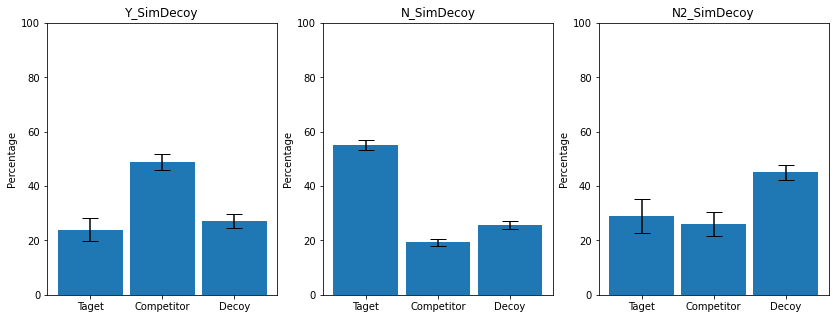

In [72]:
Y_SimDecoy_mean_perc = np.array([target_Y_SimDecoy_mean, competitor_Y_SimDecoy_mean, decoy_Y_SimDecoy_mean])
Y_SimDecoy_sems = np.array([target_Y_SimDecoy_sem, competitor_Y_SimDecoy_sem, decoy_Y_SimDecoy_sem])

N_SimDecoy_mean_perc = np.array([target_N_SimDecoy_mean, competitor_N_SimDecoy_mean, decoy_N_SimDecoy_mean])
N_SimDecoy_sems = np.array([target_N_SimDecoy_sem, competitor_N_SimDecoy_sem, decoy_N_SimDecoy_sem])

N2_SimDecoy_mean_perc = np.array([target_N2_SimDecoy_mean, competitor_N2_SimDecoy_mean, decoy_N2_SimDecoy_mean])
N2_SimDecoy_sems = np.array([target_N2_SimDecoy_sem, competitor_N2_SimDecoy_sem, decoy_N2_SimDecoy_sem])

barGraphDecoys3(Y_SimDecoy_mean_perc, Y_SimDecoy_sems, 'Y_SimDecoy', N_SimDecoy_mean_perc, N_SimDecoy_sems, 'N_SimDecoy', N2_SimDecoy_mean_perc, N2_SimDecoy_sems, 'N2_SimDecoy')

#### Examining High vs. Low Coupling

In [73]:
Y_SD_Sim_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "S"]
Y_SD_Sim_LC_df = Y_SD_Sim_df[~Y_SD_Sim_df.Survey_ID.isin(Y_SimDecoy_LC_IDS) == False]
Y_SD_Sim_HC_df = Y_SD_Sim_df[~Y_SD_Sim_df.Survey_ID.isin(Y_SimDecoy_HC_IDS) == False]

Y_SD_Sim_df = Y_SD_Sim_df.reset_index()
Y_SD_Sim_LC_df = Y_SD_Sim_LC_df.reset_index()
Y_SD_Sim_HC_df = Y_SD_Sim_HC_df.reset_index()

Y_SD_Sim_freq_df = partFreq_Decoy(Y_SD_Sim_df, "Sim_Decoy")
Y_SD_Sim_LC_freq_df = partFreq_Decoy(Y_SD_Sim_LC_df, "Sim_Decoy")
Y_SD_Sim_HC_freq_df = partFreq_Decoy(Y_SD_Sim_HC_df, "Sim_Decoy")

# Get mean, std, and sem for all participatns.
target_Y_SD_S_mean, target_Y_SD_S_std, target_Y_SD_S_sem = get_decoy_stats(Y_SD_Sim_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_S_mean, competitor_Y_SD_S_std, competitor_Y_SD_S_sem = get_decoy_stats(Y_SD_Sim_freq_df, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SD_C_mean, decoy_Y_SD_C_std, decoy_Y_SD_C_sem = get_decoy_stats(Y_SD_Sim_freq_df, "Sim_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_Y_SD_LC_S_mean, target_Y_SD_LC_S_std, target_Y_SD_LC_S_sem = get_decoy_stats(Y_SD_Sim_LC_freq_df, "Target(%)", total_Y_SD_LC)
competitor_Y_SD_LC_S_mean, competitor_Y_SD_LC_S_std, competitor_Y_SD_LC_S_sem = get_decoy_stats(Y_SD_Sim_LC_freq_df, "Competitor(%)", total_Y_SD_LC)
decoy_Y_SD_LC_S_mean, decoy_Y_SD_LC_S_std, decoy_Y_SD_LC_S_sem = get_decoy_stats(Y_SD_Sim_LC_freq_df, "Sim_Decoy(%)", total_Y_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_Y_SD_HC_S_mean, target_Y_SD_HC_S_std, target_Y_SD_HC_S_sem = get_decoy_stats(Y_SD_Sim_HC_freq_df, "Target(%)", total_Y_SD_HC)
competitor_Y_SD_HC_S_mean, competitor_Y_SD_HC_S_std, competitor_Y_SD_HC_S_sem = get_decoy_stats(Y_SD_Sim_HC_freq_df, "Competitor(%)", total_Y_SD_HC)
decoy_Y_SD_HC_S_mean, decoy_Y_SD_HC_S_std, decoy_Y_SD_HC_S_sem = get_decoy_stats(Y_SD_Sim_HC_freq_df, "Sim_Decoy(%)", total_Y_SD_HC)

# Show info for all groups.
SimDecoy_full_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_S_mean, target_Y_SD_LC_S_mean, target_Y_SD_HC_S_mean],
                  'Target sem(%)': [target_Y_SD_S_sem, target_Y_SD_LC_S_sem, target_Y_SD_HC_S_sem],
                  'Comp mean(%)': [competitor_Y_SD_S_mean, competitor_Y_SD_LC_S_mean, competitor_Y_SD_HC_S_mean],
                  'Comp sem(%)': [competitor_Y_SD_S_sem, competitor_Y_SD_LC_S_sem, competitor_Y_SD_HC_S_sem],
                  'Decoy mean(%)': [decoy_Y_SD_C_mean, decoy_Y_SD_LC_S_mean, decoy_Y_SD_HC_S_mean],
                  'Decoy sem(%)': [decoy_Y_SD_C_sem, decoy_Y_SD_LC_S_sem, decoy_Y_SD_HC_S_sem]},
                  index=["Y_SimDecoy", "Y_SimDecoy_LC", "Y_SimDecoy_HC"])

SimDecoy_full_df.head()

#Y_SimDecoy_LC -> Only 1 participant. 

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SimDecoy,24.0,4.3,49.0,2.92,27.0,2.55
Y_SimDecoy_LC,NaN,NaN,NaN,NaN,NaN,NaN
Y_SimDecoy_HC,24.0,4.3,49.0,2.92,27.0,2.55


/Users/luisalvarez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


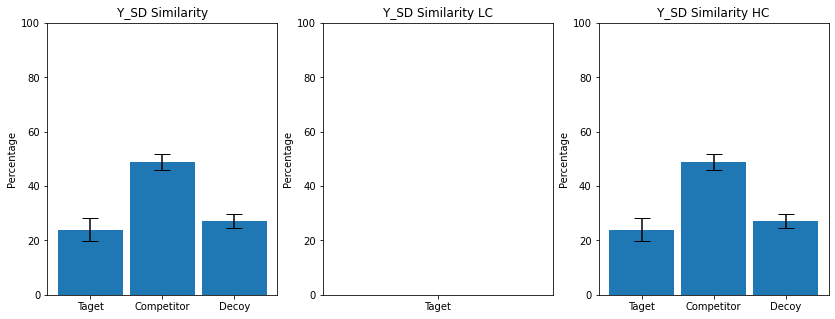

In [74]:
sim_decoy_mean_perc = np.array([target_Y_SD_S_mean, competitor_Y_SD_S_mean, decoy_Y_SD_C_mean])
sim_decoy_sems = np.array([target_Y_SD_S_sem, competitor_Y_SD_S_sem, decoy_Y_SD_C_sem])

sim_decoy_mean_perc_LC = np.array([target_Y_SD_LC_S_mean, competitor_Y_SD_LC_S_mean, decoy_Y_SD_LC_S_mean])
sim_decoy_sems_LC = np.array([target_Y_SD_LC_S_sem, competitor_Y_SD_LC_S_sem, decoy_Y_SD_LC_S_sem])

sim_decoy_mean_perc_HC = np.array([target_Y_SD_HC_S_mean, competitor_Y_SD_HC_S_mean, decoy_Y_SD_HC_S_mean])
sim_decoy_sems_HC = np.array([target_Y_SD_HC_S_sem, competitor_Y_SD_HC_S_sem, decoy_Y_SD_HC_S_sem])

barGraphDecoys3(sim_decoy_mean_perc, sim_decoy_sems, 'Y_SD Similarity', sim_decoy_mean_perc_LC, sim_decoy_sems_LC, 'Y_SD Similarity LC', sim_decoy_mean_perc_HC, sim_decoy_sems_HC, 'Y_SD Similarity HC')


In [75]:
N_SD_Sim_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "S"]
N_SD_Sim_LC_df = N_SD_Sim_df[~N_SD_Sim_df.Survey_ID.isin(N_SimDecoy_LC_IDS) == False]
N_SD_Sim_HC_df = N_SD_Sim_df[~N_SD_Sim_df.Survey_ID.isin(N_SimDecoy_HC_IDS) == False]

N_SD_Sim_df = N_SD_Sim_df.reset_index()
N_SD_Sim_LC_df = N_SD_Sim_LC_df.reset_index()
N_SD_Sim_HC_df = N_SD_Sim_HC_df.reset_index()

N_SD_Sim_freq_df = partFreq_Decoy(N_SD_Sim_df, "Sim_Decoy")
N_SD_Sim_LC_freq_df = partFreq_Decoy(N_SD_Sim_LC_df, "Sim_Decoy")
N_SD_Sim_HC_freq_df = partFreq_Decoy(N_SD_Sim_HC_df, "Sim_Decoy")

# Get mean, std, and sem for all participatns.
target_N_SD_S_mean, target_N_SD_S_std, target_N_SD_S_sem = get_decoy_stats(N_SD_Sim_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_S_mean, competitor_N_SD_S_std, competitor_N_SD_S_sem = get_decoy_stats(N_SD_Sim_freq_df, "Competitor(%)", total_N_SimDecoy)
decoy_N_SD_C_mean, decoy_N_SD_C_std, decoy_N_SD_C_sem = get_decoy_stats(N_SD_Sim_freq_df, "Sim_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N_SD_LC_S_mean, target_N_SD_LC_S_std, target_N_SD_LC_S_sem = get_decoy_stats(N_SD_Sim_LC_freq_df, "Target(%)", total_N_SD_LC)
competitor_N_SD_LC_S_mean, competitor_N_SD_LC_S_std, competitor_N_SD_LC_S_sem = get_decoy_stats(N_SD_Sim_LC_freq_df, "Competitor(%)", total_N_SD_LC)
decoy_N_SD_LC_S_mean, decoy_N_SD_LC_S_std, decoy_N_SD_LC_S_sem = get_decoy_stats(N_SD_Sim_LC_freq_df, "Sim_Decoy(%)", total_N_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N_SD_HC_S_mean, target_N_SD_HC_S_std, target_N_SD_HC_S_sem = get_decoy_stats(N_SD_Sim_HC_freq_df, "Target(%)", total_N_SD_HC)
competitor_N_SD_HC_S_mean, competitor_N_SD_HC_S_std, competitor_N_SD_HC_S_sem = get_decoy_stats(N_SD_Sim_HC_freq_df, "Competitor(%)", total_N_SD_HC)
decoy_N_SD_HC_S_mean, decoy_N_SD_HC_S_std, decoy_N_SD_HC_S_sem = get_decoy_stats(N_SD_Sim_HC_freq_df, "Sim_Decoy(%)", total_N_SD_HC)

# Show info for all groups.
SimDecoy_N_full_df = pd.DataFrame({'Target mean(%)': [target_N_SD_S_mean, target_N_SD_LC_S_mean, target_N_SD_HC_S_mean],
                  'Target sem(%)': [target_N_SD_S_sem, target_N_SD_LC_S_sem, target_N_SD_HC_S_sem],
                  'Comp mean(%)': [competitor_N_SD_S_mean, competitor_N_SD_LC_S_mean, competitor_N_SD_HC_S_mean],
                  'Comp sem(%)': [competitor_N_SD_S_sem, competitor_N_SD_LC_S_sem, competitor_N_SD_HC_S_sem],
                  'Decoy mean(%)': [decoy_N_SD_C_mean, decoy_N_SD_LC_S_mean, decoy_N_SD_HC_S_mean],
                  'Decoy sem(%)': [decoy_N_SD_C_sem, decoy_N_SD_LC_S_sem, decoy_N_SD_HC_S_sem]},
                  index=["N_SimDecoy", "N_SimDecoy_LC", "N_SimDecoy_HC"])

SimDecoy_N_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N_SimDecoy,55.12,1.87,19.25,1.31,25.62,1.37
N_SimDecoy_LC,56.00,2.82,18.50,2.06,25.50,2.02
N_SimDecoy_HC,54.25,2.52,20.00,1.66,25.75,1.89


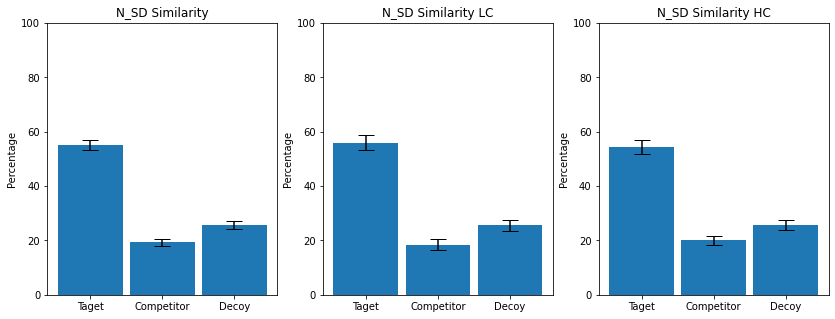

In [76]:
sim_decoy_mean_perc = np.array([target_N_SD_S_mean, competitor_N_SD_S_mean, decoy_N_SD_C_mean])
sim_decoy_sems = np.array([target_N_SD_S_sem, competitor_N_SD_S_sem, decoy_N_SD_C_sem])

sim_decoy_mean_perc_LC = np.array([target_N_SD_LC_S_mean, competitor_N_SD_LC_S_mean, decoy_N_SD_LC_S_mean])
sim_decoy_sems_LC = np.array([target_N_SD_LC_S_sem, competitor_N_SD_LC_S_sem, decoy_N_SD_LC_S_sem])

sim_decoy_mean_perc_HC = np.array([target_N_SD_HC_S_mean, competitor_N_SD_HC_S_mean, decoy_N_SD_HC_S_mean])
sim_decoy_sems_HC = np.array([target_N_SD_HC_S_sem, competitor_N_SD_HC_S_sem, decoy_N_SD_HC_S_sem])

barGraphDecoys3(sim_decoy_mean_perc, sim_decoy_sems, 'N_SD Similarity', sim_decoy_mean_perc_LC, sim_decoy_sems_LC, 'N_SD Similarity LC', sim_decoy_mean_perc_HC, sim_decoy_sems_HC, 'N_SD Similarity HC')


In [77]:
N2_SD_Sim_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "S"]
N2_SD_Sim_LC_df = N2_SD_Sim_df[~N2_SD_Sim_df.Survey_ID.isin(N2_SimDecoy_LC_IDS) == False]
N2_SD_Sim_HC_df = N2_SD_Sim_df[~N2_SD_Sim_df.Survey_ID.isin(N2_SimDecoy_HC_IDS) == False]

N2_SD_Sim_df = N2_SD_Sim_df.reset_index()
N2_SD_Sim_LC_df = N2_SD_Sim_LC_df.reset_index()
N2_SD_Sim_HC_df = N2_SD_Sim_HC_df.reset_index()

N2_SD_Sim_freq_df = partFreq_Decoy(N2_SD_Sim_df, "Sim_Decoy")
N2_SD_Sim_LC_freq_df = partFreq_Decoy(N2_SD_Sim_LC_df, "Sim_Decoy")
N2_SD_Sim_HC_freq_df = partFreq_Decoy(N2_SD_Sim_HC_df, "Sim_Decoy")

# Get mean, std, and sem for all participatns.
target_N2_SD_S_mean, target_N2_SD_S_std, target_N2_SD_S_sem = get_decoy_stats(N2_SD_Sim_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_S_mean, competitor_N2_SD_S_std, competitor_N2_SD_S_sem = get_decoy_stats(N2_SD_Sim_freq_df, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SD_C_mean, decoy_N2_SD_C_std, decoy_N2_SD_C_sem = get_decoy_stats(N2_SD_Sim_freq_df, "Sim_Decoy(%)", total_N2_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N2_SD_LC_S_mean, target_N2_SD_LC_S_std, target_N2_SD_LC_S_sem = get_decoy_stats(N2_SD_Sim_LC_freq_df, "Target(%)", total_N2_SD_LC)
competitor_N2_SD_LC_S_mean, competitor_N2_SD_LC_S_std, competitor_N2_SD_LC_S_sem = get_decoy_stats(N2_SD_Sim_LC_freq_df, "Competitor(%)", total_N2_SD_LC)
decoy_N2_SD_LC_S_mean, decoy_N2_SD_LC_S_std, decoy_N2_SD_LC_S_sem = get_decoy_stats(N2_SD_Sim_LC_freq_df, "Sim_Decoy(%)", total_N2_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N2_SD_HC_S_mean, target_N2_SD_HC_S_std, target_N2_SD_HC_S_sem = get_decoy_stats(N2_SD_Sim_HC_freq_df, "Target(%)", total_N2_SD_HC)
competitor_N2_SD_HC_S_mean, competitor_N2_SD_HC_S_std, competitor_N2_SD_HC_S_sem = get_decoy_stats(N2_SD_Sim_HC_freq_df, "Competitor(%)", total_N2_SD_HC)
decoy_N2_SD_HC_S_mean, decoy_N2_SD_HC_S_std, decoy_N2_SD_HC_S_sem = get_decoy_stats(N2_SD_Sim_HC_freq_df, "Sim_Decoy(%)", total_N2_SD_HC)

# Show info for all groups.
SimDecoy_N2_full_df = pd.DataFrame({'Target mean(%)': [target_N2_SD_S_mean, target_N2_SD_LC_S_mean, target_N2_SD_HC_S_mean],
                  'Target sem(%)': [target_N2_SD_S_sem, target_N2_SD_LC_S_sem, target_N2_SD_HC_S_sem],
                  'Comp mean(%)': [competitor_N2_SD_S_mean, competitor_N2_SD_LC_S_mean, competitor_N2_SD_HC_S_mean],
                  'Comp sem(%)': [competitor_N2_SD_S_sem, competitor_N2_SD_LC_S_sem, competitor_N2_SD_HC_S_sem],
                  'Decoy mean(%)': [decoy_N2_SD_C_mean, decoy_N2_SD_LC_S_mean, decoy_N2_SD_HC_S_mean],
                  'Decoy sem(%)': [decoy_N2_SD_C_sem, decoy_N2_SD_LC_S_sem, decoy_N2_SD_HC_S_sem]},
                  index=["N2_SimDecoy", "N2_SimDecoy_LC", "N2_SimDecoy_HC"])

SimDecoy_N2_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N2_SimDecoy,29.0,6.20,26.0,4.3,45.0,2.74
N2_SimDecoy_LC,27.5,7.77,27.5,5.2,45.0,3.54
N2_SimDecoy_HC,35.0,NaN,20.0,NaN,45.0,NaN


/Users/luisalvarez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


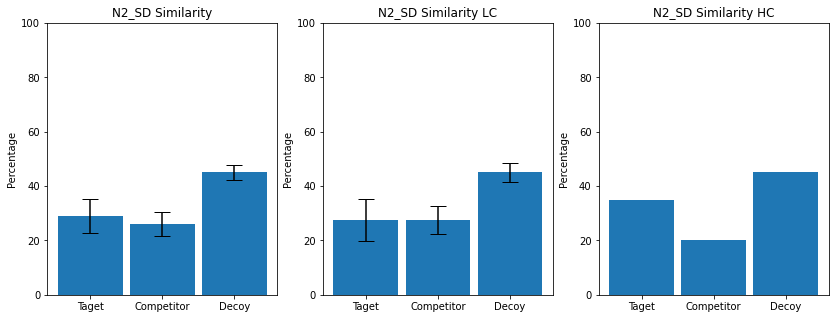

In [78]:
sim_decoy_mean_perc = np.array([target_N2_SD_S_mean, competitor_N2_SD_S_mean, decoy_N2_SD_C_mean])
sim_decoy_sems = np.array([target_N2_SD_S_sem, competitor_N2_SD_S_sem, decoy_N2_SD_C_sem])

sim_decoy_mean_perc_LC = np.array([target_N2_SD_LC_S_mean, competitor_N2_SD_LC_S_mean, decoy_N2_SD_LC_S_mean])
sim_decoy_sems_LC = np.array([target_N2_SD_LC_S_sem, competitor_N2_SD_LC_S_sem, decoy_N2_SD_LC_S_sem])

sim_decoy_mean_perc_HC = np.array([target_N2_SD_HC_S_mean, competitor_N2_SD_HC_S_mean, decoy_N2_SD_HC_S_mean])
sim_decoy_sems_HC = np.array([target_N2_SD_HC_S_sem, competitor_N2_SD_HC_S_sem, decoy_N2_SD_HC_S_sem])

barGraphDecoys3(sim_decoy_mean_perc, sim_decoy_sems, 'N2_SD Similarity', sim_decoy_mean_perc_LC, sim_decoy_sems_LC, 'N2_SD Similarity LC', sim_decoy_mean_perc_HC, sim_decoy_sems_HC, 'N2_SD Similarity HC')


### Compromise Decoy

In [79]:
Y_SD_Com_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "C"]
N_SD_Com_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "C"]
N2_SD_Com_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "C"]

Y_SD_Com_df = Y_SD_Com_df.reset_index()
N_SD_Com_df = N_SD_Com_df.reset_index()
N2_SD_Com_df = N2_SD_Com_df.reset_index()

Y_SD_Com_freq_df = partFreq_Decoy(Y_SD_Com_df, "Com_Decoy")
N_SD_Com_freq_df = partFreq_Decoy(N_SD_Com_df, "Com_Decoy")
N2_SD_Com_freq_df = partFreq_Decoy(N2_SD_Com_df, "Com_Decoy")

# Get mean, std, and sem for all participatns. # Fix comment.
target_Y_SD_C_mean, target_Y_SD_C_std, target_Y_SD_C_sem = get_decoy_stats(Y_SD_Com_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_C_mean, competitor_Y_SD_C_std, competitor_Y_SD_C_sem = get_decoy_stats(Y_SD_Com_freq_df, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SD_C_mean, decoy_Y_SD_C_std, decoy_Y_SD_C_sem = get_decoy_stats(Y_SD_Com_freq_df, "Com_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns. # Fix comment.
target_N_SD_C_mean, target_N_SD_C_std, target_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_C_mean, competitor_N_SD_C_std, competitor_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Competitor(%)", total_N_SimDecoy)
decoy_N_SD_C_mean, decoy_N_SD_C_std, decoy_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Com_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'High coupling' participatns. # Fix comment.
target_N2_SD_C_mean, target_N2_SD_C_std, target_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_C_mean, competitor_N2_SD_C_std, competitor_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SD_C_mean, decoy_N2_SD_C_std, decoy_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Com_Decoy(%)", total_N2_SimDecoy)

# Show info for all groups.
Com_SD_summary_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_C_mean, target_N_SD_C_mean, target_N2_SD_C_mean],
                  'Target sem(%)': [target_Y_SD_C_sem, target_N_SD_C_sem, target_N2_SD_C_sem],
                  'Comp mean(%)': [competitor_Y_SD_C_mean, competitor_N_SD_C_mean, competitor_N2_SD_C_mean],
                  'Comp sem(%)': [competitor_Y_SD_C_sem, competitor_N_SD_C_sem, competitor_N2_SD_C_sem],
                  'Decoy mean(%)': [decoy_Y_SD_C_mean, decoy_N_SD_C_mean, decoy_N2_SD_C_mean],
                  'Decoy sem(%)': [decoy_Y_SD_C_sem, decoy_N_SD_C_sem, decoy_N2_SD_C_sem]},
                  index=["Y_SD Compromise", "N_SD Compromise", "N2_SD Compromise"])

Com_SD_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SD Compromise,46.0,9.41,35.0,3.16,19.0,7.31
N_SD Compromise,64.0,2.70,23.5,1.66,12.5,1.47
N2_SD Compromise,49.0,11.34,33.0,8.46,18.0,5.15


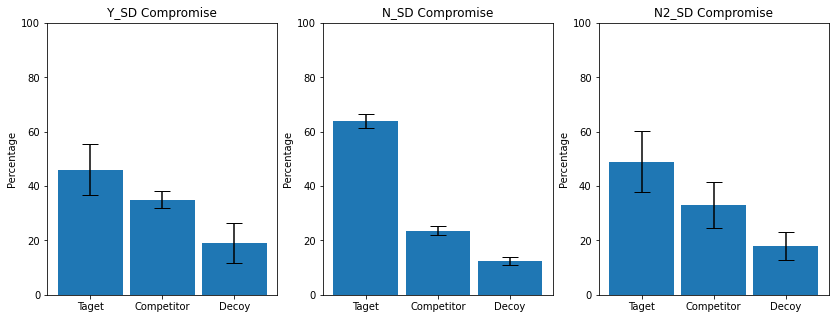

In [80]:
com_decoy_mean_perc = np.array([target_Y_SD_C_mean, competitor_Y_SD_C_mean, decoy_Y_SD_C_mean])
com_decoy_sems = np.array([target_Y_SD_C_sem, competitor_Y_SD_C_sem, decoy_Y_SD_C_sem])

com_decoy_mean_perc_LC = np.array([target_N_SD_C_mean, competitor_N_SD_C_mean, decoy_N_SD_C_mean])
com_decoy_sems_LC = np.array([target_N_SD_C_sem, competitor_N_SD_C_sem, decoy_N_SD_C_sem])

com_decoy_mean_perc_HC = np.array([target_N2_SD_C_mean, competitor_N2_SD_C_mean, decoy_N2_SD_C_mean])
com_decoy_sems_HC = np.array([target_N2_SD_C_sem, competitor_N2_SD_C_sem, decoy_N2_SD_C_sem])

barGraphDecoys3(com_decoy_mean_perc, com_decoy_sems, 'Y_SD Compromise', com_decoy_mean_perc_LC, com_decoy_sems_LC, 'N_SD Compromise', com_decoy_mean_perc_HC, com_decoy_sems_HC, 'N2_SD Compromise')


In [81]:
Y_SD_Com_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "C"]
Y_SD_Com_LC_df = Y_SD_Com_df[~Y_SD_Com_df.Survey_ID.isin(Y_SimDecoy_LC_IDS) == False]
Y_SD_Com_HC_df = Y_SD_Com_df[~Y_SD_Com_df.Survey_ID.isin(Y_SimDecoy_HC_IDS) == False]

Y_SD_Com_df = Y_SD_Com_df.reset_index()
Y_SD_Com_LC_df = Y_SD_Com_LC_df.reset_index()
Y_SD_Com_HC_df = Y_SD_Com_HC_df.reset_index()

Y_SD_Com_freq_df = partFreq_Decoy(Y_SD_Com_df, "Com_Decoy")
Y_SD_Com_LC_freq_df = partFreq_Decoy(Y_SD_Com_LC_df, "Com_Decoy")
Y_SD_Com_HC_freq_df = partFreq_Decoy(Y_SD_Com_HC_df, "Com_Decoy")

# Get mean, std, and sem for all participatns.
target_Y_SD_C_mean, target_Y_SD_C_std, target_Y_SD_C_sem = get_decoy_stats(Y_SD_Com_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_S_mean, competitor_Y_SD_S_std, competitor_Y_SD_S_sem = get_decoy_stats(Y_SD_Com_freq_df, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SD_C_mean, decoy_Y_SD_C_std, decoy_Y_SD_C_sem = get_decoy_stats(Y_SD_Com_freq_df, "Com_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_Y_SD_LC_C_mean, target_Y_SD_LC_C_std, target_Y_SD_LC_C_sem = get_decoy_stats(Y_SD_Com_LC_freq_df, "Target(%)", total_Y_SD_LC)
competitor_Y_SD_LC_C_mean, competitor_Y_SD_LC_C_std, competitor_Y_SD_LC_C_sem = get_decoy_stats(Y_SD_Com_LC_freq_df, "Competitor(%)", total_Y_SD_LC)
decoy_Y_SD_LC_C_mean, decoy_Y_SD_LC_C_std, decoy_Y_SD_LC_C_sem = get_decoy_stats(Y_SD_Com_LC_freq_df, "Com_Decoy(%)", total_Y_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_Y_SD_HC_C_mean, target_Y_SD_HC_C_std, target_Y_SD_HC_C_sem = get_decoy_stats(Y_SD_Com_HC_freq_df, "Target(%)", total_Y_SD_HC)
competitor_Y_SD_HC_C_mean, competitor_Y_SD_HC_C_std, competitor_Y_SD_HC_C_sem = get_decoy_stats(Y_SD_Com_HC_freq_df, "Competitor(%)", total_Y_SD_HC)
decoy_Y_SD_HC_C_mean, decoy_Y_SD_HC_C_std, decoy_Y_SD_HC_C_sem = get_decoy_stats(Y_SD_Com_HC_freq_df, "Com_Decoy(%)", total_Y_SD_HC)

# Show info for all groups.
ComDecoy_Y_full_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_C_mean, target_Y_SD_LC_C_mean, target_Y_SD_HC_C_mean],
                  'Target sem(%)': [target_Y_SD_C_sem, target_Y_SD_LC_C_sem, target_Y_SD_HC_C_sem],
                  'Comp mean(%)': [competitor_Y_SD_C_mean, competitor_Y_SD_LC_C_mean, competitor_Y_SD_HC_C_mean],
                  'Comp sem(%)': [competitor_Y_SD_C_sem, competitor_Y_SD_LC_C_sem, competitor_Y_SD_HC_C_sem],
                  'Decoy mean(%)': [decoy_Y_SD_C_mean, decoy_Y_SD_LC_C_mean, decoy_Y_SD_HC_C_mean],
                  'Decoy sem(%)': [decoy_Y_SD_C_sem, decoy_Y_SD_LC_C_sem, decoy_Y_SD_HC_C_sem]},
                  index=["Y_SimDecoy Compromise", "Y_SimDecoy_LC Compromise", "Y_SimDecoy_HC Compromise"])

ComDecoy_Y_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SimDecoy Compromise,46.0,9.41,35.0,3.16,19.0,7.31
Y_SimDecoy_LC Compromise,NaN,NaN,NaN,NaN,NaN,NaN
Y_SimDecoy_HC Compromise,46.0,9.41,35.0,3.16,19.0,7.31


/Users/luisalvarez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


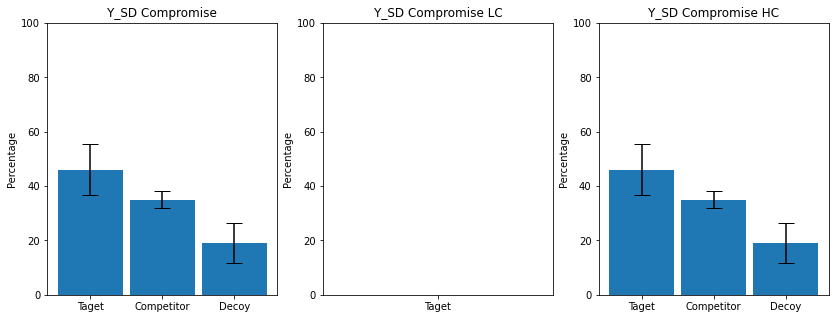

In [82]:
com_decoy_mean_perc = np.array([target_Y_SD_C_mean, competitor_Y_SD_C_mean, decoy_Y_SD_C_mean])
com_decoy_sems = np.array([target_Y_SD_C_sem, competitor_Y_SD_C_sem, decoy_Y_SD_C_sem])

com_decoy_mean_perc_LC = np.array([target_Y_SD_LC_C_mean, competitor_Y_SD_LC_C_mean, decoy_Y_SD_LC_C_mean])
com_decoy_sems_LC = np.array([target_Y_SD_LC_C_sem, competitor_Y_SD_LC_C_sem, decoy_Y_SD_LC_C_sem])

com_decoy_mean_perc_HC = np.array([target_Y_SD_HC_C_mean, competitor_Y_SD_HC_C_mean, decoy_Y_SD_HC_C_mean])
com_decoy_sems_HC = np.array([target_Y_SD_HC_C_sem, competitor_Y_SD_HC_C_sem, decoy_Y_SD_HC_C_sem])

barGraphDecoys3(com_decoy_mean_perc, com_decoy_sems, 'Y_SD Compromise', com_decoy_mean_perc_LC, com_decoy_sems_LC, 'Y_SD Compromise LC', com_decoy_mean_perc_HC, com_decoy_sems_HC, 'Y_SD Compromise HC')


In [83]:
N_SD_Com_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "C"]
N_SD_Com_LC_df = N_SD_Com_df[~N_SD_Com_df.Survey_ID.isin(N_SimDecoy_LC_IDS) == False]
N_SD_Com_HC_df = N_SD_Com_df[~N_SD_Com_df.Survey_ID.isin(N_SimDecoy_HC_IDS) == False]

N_SD_Com_df = N_SD_Com_df.reset_index()
N_SD_Com_LC_df = N_SD_Com_LC_df.reset_index()
N_SD_Com_HC_df = N_SD_Com_HC_df.reset_index()

N_SD_Com_freq_df = partFreq_Decoy(N_SD_Com_df, "Com_Decoy")
N_SD_Com_LC_freq_df = partFreq_Decoy(N_SD_Com_LC_df, "Com_Decoy")
N_SD_Com_HC_freq_df = partFreq_Decoy(N_SD_Com_HC_df, "Com_Decoy")

# Get mean, std, and sem for all participatns.
target_N_SD_C_mean, target_N_SD_C_std, target_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_C_mean, competitor_N_SD_C_std, competitor_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Competitor(%)", total_N_SimDecoy)
decoy_N_SD_C_mean, decoy_N_SD_C_std, decoy_N_SD_C_sem = get_decoy_stats(N_SD_Com_freq_df, "Com_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N_SD_LC_C_mean, target_N_SD_LC_C_std, target_N_SD_LC_C_sem = get_decoy_stats(N_SD_Com_LC_freq_df, "Target(%)", total_N_SD_LC)
competitor_N_SD_LC_C_mean, competitor_N_SD_LC_C_std, competitor_N_SD_LC_C_sem = get_decoy_stats(N_SD_Com_LC_freq_df, "Competitor(%)", total_N_SD_LC)
decoy_N_SD_LC_C_mean, decoy_N_SD_LC_C_std, decoy_N_SD_LC_C_sem = get_decoy_stats(N_SD_Com_LC_freq_df, "Com_Decoy(%)", total_N_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N_SD_HC_C_mean, target_N_SD_HC_C_std, target_N_SD_HC_C_sem = get_decoy_stats(N_SD_Com_HC_freq_df, "Target(%)", total_N_SD_HC)
competitor_N_SD_HC_C_mean, competitor_N_SD_HC_C_std, competitor_N_SD_HC_C_sem = get_decoy_stats(N_SD_Com_HC_freq_df, "Competitor(%)", total_N_SD_HC)
decoy_N_SD_HC_C_mean, decoy_N_SD_HC_C_std, decoy_N_SD_HC_C_sem = get_decoy_stats(N_SD_Com_HC_freq_df, "Com_Decoy(%)", total_N_SD_HC)

# Show info for all groups.
ComDecoy_N_full_df = pd.DataFrame({'Target mean(%)': [target_N_SD_C_mean, target_N_SD_LC_C_mean, target_N_SD_HC_C_mean],
                  'Target sem(%)': [target_N_SD_C_sem, target_N_SD_LC_C_sem, target_N_SD_HC_C_sem],
                  'Comp mean(%)': [competitor_N_SD_C_mean, competitor_N_SD_LC_C_mean, competitor_N_SD_HC_C_mean],
                  'Comp sem(%)': [competitor_N_SD_C_sem, competitor_N_SD_LC_C_sem, competitor_N_SD_HC_C_sem],
                  'Decoy mean(%)': [decoy_N_SD_C_mean, decoy_N_SD_LC_C_mean, decoy_N_SD_HC_C_mean],
                  'Decoy sem(%)': [decoy_N_SD_C_sem, decoy_N_SD_LC_C_sem, decoy_N_SD_HC_C_sem]},
                  index=["N_SimDecoy Compromise", "N_SimDecoy_LC Compromise", "N_SimDecoy_HC Compromise"])

ComDecoy_N_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N_SimDecoy Compromise,64.0,2.70,23.5,1.66,12.5,1.47
N_SimDecoy_LC Compromise,65.0,4.29,22.0,2.28,13.0,2.58
N_SimDecoy_HC Compromise,63.0,3.37,25.0,2.43,12.0,1.47


In [84]:
N2_SD_Com_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "C"]
N2_SD_Com_LC_df = N2_SD_Com_df[~N2_SD_Com_df.Survey_ID.isin(N2_SimDecoy_LC_IDS) == False]
N2_SD_Com_HC_df = N2_SD_Com_df[~N2_SD_Com_df.Survey_ID.isin(N2_SimDecoy_HC_IDS) == False]

N2_SD_Com_df = N2_SD_Com_df.reset_index()
N2_SD_Com_LC_df = N2_SD_Com_LC_df.reset_index()
N2_SD_Com_HC_df = N2_SD_Com_HC_df.reset_index()

N2_SD_Com_freq_df = partFreq_Decoy(N2_SD_Com_df, "Com_Decoy")
N2_SD_Com_LC_freq_df = partFreq_Decoy(N2_SD_Com_LC_df, "Com_Decoy")
N2_SD_Com_HC_freq_df = partFreq_Decoy(N2_SD_Com_HC_df, "Com_Decoy")

# Get mean, std, and sem for all participatns.
target_N2_SD_C_mean, target_N2_SD_C_std, target_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_C_mean, competitor_N2_SD_C_std, competitor_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SD_C_mean, decoy_N2_SD_C_std, decoy_N2_SD_C_sem = get_decoy_stats(N2_SD_Com_freq_df, "Com_Decoy(%)", total_N2_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N2_SD_LC_C_mean, target_N2_SD_LC_C_std, target_N2_SD_LC_C_sem = get_decoy_stats(N2_SD_Com_LC_freq_df, "Target(%)", total_N2_SD_LC)
competitor_N2_SD_LC_C_mean, competitor_N2_SD_LC_C_std, competitor_N2_SD_LC_C_sem = get_decoy_stats(N2_SD_Com_LC_freq_df, "Competitor(%)", total_N2_SD_LC)
decoy_N2_SD_LC_C_mean, decoy_N2_SD_LC_C_std, decoy_N2_SD_LC_C_sem = get_decoy_stats(N2_SD_Com_LC_freq_df, "Com_Decoy(%)", total_N2_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N2_SD_HC_C_mean, target_N2_SD_HC_C_std, target_N2_SD_HC_C_sem = get_decoy_stats(N2_SD_Com_HC_freq_df, "Target(%)", total_N2_SD_HC)
competitor_N2_SD_HC_C_mean, competitor_N2_SD_HC_C_std, competitor_N2_SD_HC_C_sem = get_decoy_stats(N2_SD_Com_HC_freq_df, "Competitor(%)", total_N2_SD_HC)
decoy_N2_SD_HC_C_mean, decoy_N2_SD_HC_C_std, decoy_N2_SD_HC_C_sem = get_decoy_stats(N2_SD_Com_HC_freq_df, "Com_Decoy(%)", total_N2_SD_HC)

# Show info for all groups.
ComDecoy_N2_full_df = pd.DataFrame({'Target mean(%)': [target_N2_SD_C_mean, target_N2_SD_LC_C_mean, target_N2_SD_HC_C_mean],
                  'Target sem(%)': [target_N2_SD_C_sem, target_N2_SD_LC_C_sem, target_N2_SD_HC_C_sem],
                  'Comp mean(%)': [competitor_N2_SD_C_mean, competitor_N2_SD_LC_C_mean, competitor_N2_SD_HC_C_mean],
                  'Comp sem(%)': [competitor_N2_SD_C_sem, competitor_N2_SD_LC_C_sem, competitor_N2_SD_HC_C_sem],
                  'Decoy mean(%)': [decoy_N2_SD_C_mean, decoy_N2_SD_LC_C_mean, decoy_N2_SD_HC_C_mean],
                  'Decoy sem(%)': [decoy_N2_SD_C_sem, decoy_N2_SD_LC_C_sem, decoy_N2_SD_HC_C_sem]},
                  index=["N2_SimDecoy Compromise", "N2_SimDecoy_LC Compromise", "N2_SimDecoy_HC Compromise"])

ComDecoy_N2_full_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N2_SimDecoy Compromise,49.00,11.34,33.00,8.46,18.0,5.15
N2_SimDecoy_LC Compromise,53.75,13.29,28.75,9.44,17.5,6.61
N2_SimDecoy_HC Compromise,30.00,NaN,50.00,NaN,20.0,NaN


### Attraction Decoy

In [85]:
Y_SD_Att_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "A"]
N_SD_Att_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "A"]
N2_SD_Att_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "A"]

Y_SD_Att_df = Y_SD_Att_df.reset_index()
N_SD_Att_df = N_SD_Att_df.reset_index()
N2_SD_Att_df = N2_SD_Att_df.reset_index()

Y_SD_Att_freq_df = partFreq_Decoy(Y_SD_Att_df, "Att_Decoy")
N_SD_Att_freq_df = partFreq_Decoy(N_SD_Att_df, "Att_Decoy")
N2_SD_Att_freq_df = partFreq_Decoy(N2_SD_Att_df, "Att_Decoy")

# Get mean, std, and sem for all participatns.
target_Y_SD_A_mean, target_Y_SD_A_std, target_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_A_mean, competitor_Y_SD_A_std, competitor_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SD_A_mean, decoy_Y_SD_A_std, decoy_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Att_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N_SD_A_mean, target_N_SD_A_std, target_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_A_mean, competitor_N_SD_A_std, competitor_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Competitor(%)", total_N_SimDecoy)
decoy_N_SD_A_mean, decoy_N_SD_A_std, decoy_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Att_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'High coupling' participatns.
target_N2_SD_A_mean, target_N2_SD_A_std, target_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_A_mean, competitor_N2_SD_A_std, competitor_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SD_A_mean, decoy_N2_SD_A_std, decoy_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Att_Decoy(%)", total_N2_SimDecoy)

# Show info for all groups.
Att_summary_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_A_mean, target_N_SD_A_mean, target_N2_SD_A_mean],
                  'Target sem(%)': [target_Y_SD_A_sem, target_N_SD_A_sem, target_N2_SD_A_sem],
                  'Comp mean(%)': [competitor_Y_SD_A_mean, competitor_N_SD_A_mean, competitor_N2_SD_A_mean],
                  'Comp sem(%)': [competitor_Y_SD_A_sem, competitor_N_SD_A_sem, competitor_N2_SD_A_sem],
                  'Decoy mean(%)': [decoy_Y_SD_A_mean, decoy_N_SD_A_mean, decoy_N2_SD_A_mean],
                  'Decoy sem(%)': [decoy_Y_SD_A_sem, decoy_N_SD_A_sem, decoy_N2_SD_A_sem]},
                  index=["Y_SD Attraction", "N_SD Attraction", "N2_SD Attraction"])

Att_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SD Attraction,53.0,5.39,40.00,4.74,7.00,3.39
N_SD Attraction,62.0,1.90,28.88,1.67,9.12,1.28
N2_SD Attraction,53.0,10.07,35.00,7.42,12.00,4.36


/Users/luisalvarez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


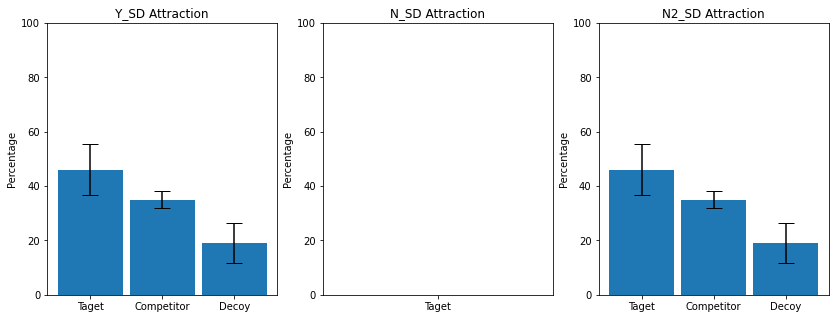

In [86]:
att_decoy_mean_perc = np.array([target_Y_SD_A_mean, competitor_Y_SD_A_mean, decoy_Y_SD_A_mean])
att_decoy_sems = np.array([target_Y_SD_A_sem, competitor_Y_SD_A_sem, decoy_Y_SD_A_sem])

att_decoy_mean_perc_LC = np.array([target_N_SD_A_mean, competitor_N_SD_A_mean, decoy_N_SD_A_mean])
att_decoy_sems_LC = np.array([target_N_SD_A_sem, competitor_N_SD_A_sem, decoy_N_SD_A_sem])

att_decoy_mean_perc_HC = np.array([target_N2_SD_A_mean, competitor_N2_SD_A_mean, decoy_N2_SD_A_mean])
att_decoy_sems_HC = np.array([target_N2_SD_A_sem, competitor_N2_SD_A_sem, decoy_N2_SD_A_sem])

barGraphDecoys3(com_decoy_mean_perc, com_decoy_sems, 'Y_SD Attraction', com_decoy_mean_perc_LC, com_decoy_sems_LC, 'N_SD Attraction', com_decoy_mean_perc_HC, com_decoy_sems_HC, 'N2_SD Attraction')


In [87]:
Y_SD_Att_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "A"]
Y_SD_Att_LC_df = Y_SD_Att_df[~Y_SD_Att_df.Survey_ID.isin(Y_SimDecoy_LC_IDS) == False]
Y_SD_Att_HC_df = Y_SD_Att_df[~Y_SD_Att_df.Survey_ID.isin(Y_SimDecoy_HC_IDS) == False]

Y_SD_Att_df = Y_SD_Att_df.reset_index()
Y_SD_Att_LC_df = Y_SD_Att_LC_df.reset_index()
Y_SD_Att_HC_df = Y_SD_Att_HC_df.reset_index()

Y_SD_Att_freq_df = partFreq_Decoy(Y_SD_Att_df, "Att_Decoy")
Y_SD_Att_LC_freq_df = partFreq_Decoy(Y_SD_Att_LC_df, "Att_Decoy")
Y_SD_Att_HC_freq_df = partFreq_Decoy(Y_SD_Att_HC_df, "Att_Decoy")

# Get mean, std, and sem for all participatns.
target_Y_SD_A_mean, target_Y_SD_A_std, target_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_A_mean, competitor_Y_SD_A_std, competitor_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Competitor(%)", total_Y_SimDecoy)
decoy_Y_SD_A_mean, decoy_Y_SD_A_std, decoy_Y_SD_A_sem = get_decoy_stats(Y_SD_Att_freq_df, "Att_Decoy(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_Y_SD_LC_A_mean, target_Y_SD_LC_A_std, target_Y_SD_LC_A_sem = get_decoy_stats(Y_SD_Att_LC_freq_df, "Target(%)", total_Y_SD_LC)
competitor_Y_SD_LC_A_mean, competitor_Y_SD_LC_A_std, competitor_Y_SD_LC_A_sem = get_decoy_stats(Y_SD_Att_LC_freq_df, "Competitor(%)", total_Y_SD_LC)
decoy_Y_SD_LC_A_mean, decoy_Y_SD_LC_A_std, decoy_Y_SD_LC_A_sem = get_decoy_stats(Y_SD_Att_LC_freq_df, "Att_Decoy(%)", total_Y_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_Y_SD_HC_A_mean, target_Y_SD_HC_A_std, target_Y_SD_HC_A_sem = get_decoy_stats(Y_SD_Att_HC_freq_df, "Target(%)", total_Y_SD_HC)
competitor_Y_SD_HC_A_mean, competitor_Y_SD_HC_A_std, competitor_Y_SD_HC_A_sem = get_decoy_stats(Y_SD_Att_HC_freq_df, "Competitor(%)", total_Y_SD_HC)
decoy_Y_SD_HC_A_mean, decoy_Y_SD_HC_A_std, decoy_Y_SD_HC_A_sem = get_decoy_stats(Y_SD_Att_HC_freq_df, "Att_Decoy(%)", total_Y_SD_HC)

# Show info for all groups.
AttDecoy_Y_full_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_A_mean, target_Y_SD_LC_A_mean, target_Y_SD_HC_A_mean],
                  'Target sem(%)': [target_Y_SD_A_sem, target_Y_SD_LC_A_sem, target_Y_SD_HC_A_sem],
                  'Comp mean(%)': [competitor_Y_SD_A_mean, competitor_Y_SD_LC_A_mean, competitor_Y_SD_HC_A_mean],
                  'Comp sem(%)': [competitor_Y_SD_A_sem, competitor_Y_SD_LC_A_sem, competitor_Y_SD_HC_A_sem],
                  'Decoy mean(%)': [decoy_Y_SD_A_mean, decoy_Y_SD_LC_A_mean, decoy_Y_SD_HC_A_mean],
                  'Decoy sem(%)': [decoy_Y_SD_A_sem, decoy_Y_SD_LC_A_sem, decoy_Y_SD_HC_A_sem]},
                  index=["Y_SimDecoy Attraction", "Y_SimDecoy_LC Attraction", "Y_SimDecoy_HC Attraction"])

AttDecoy_Y_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
Y_SimDecoy Attraction,53.0,5.39,40.0,4.74,7.0,3.39
Y_SimDecoy_LC Attraction,NaN,NaN,NaN,NaN,NaN,NaN
Y_SimDecoy_HC Attraction,53.0,5.39,40.0,4.74,7.0,3.39


In [88]:
N_SD_Att_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "A"]
N_SD_Att_LC_df = N_SD_Att_df[~N_SD_Att_df.Survey_ID.isin(N_SimDecoy_LC_IDS) == False]
N_SD_Att_HC_df = N_SD_Att_df[~N_SD_Att_df.Survey_ID.isin(N_SimDecoy_HC_IDS) == False]

N_SD_Att_df = N_SD_Att_df.reset_index()
N_SD_Att_LC_df = N_SD_Att_LC_df.reset_index()
N_SD_Att_HC_df = N_SD_Att_HC_df.reset_index()

N_SD_Att_freq_df = partFreq_Decoy(N_SD_Att_df, "Att_Decoy")
N_SD_Att_LC_freq_df = partFreq_Decoy(N_SD_Att_LC_df, "Att_Decoy")
N_SD_Att_HC_freq_df = partFreq_Decoy(N_SD_Att_HC_df, "Att_Decoy")

# Get mean, std, and sem for all participatns.
target_N_SD_A_mean, target_N_SD_A_std, target_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_A_mean, competitor_N_SD_A_std, competitor_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Competitor(%)", total_N_SimDecoy)
decoy_N_SD_A_mean, decoy_N_SD_A_std, decoy_N_SD_A_sem = get_decoy_stats(N_SD_Att_freq_df, "Att_Decoy(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N_SD_LC_A_mean, target_N_SD_LC_A_std, target_N_SD_LC_A_sem = get_decoy_stats(N_SD_Att_LC_freq_df, "Target(%)", total_N_SD_LC)
competitor_N_SD_LC_A_mean, competitor_N_SD_LC_A_std, competitor_N_SD_LC_A_sem = get_decoy_stats(N_SD_Att_LC_freq_df, "Competitor(%)", total_N_SD_LC)
decoy_N_SD_LC_A_mean, decoy_N_SD_LC_A_std, decoy_N_SD_LC_A_sem = get_decoy_stats(N_SD_Att_LC_freq_df, "Att_Decoy(%)", total_N_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N_SD_HC_A_mean, target_N_SD_HC_A_std, target_N_SD_HC_A_sem = get_decoy_stats(N_SD_Att_HC_freq_df, "Target(%)", total_N_SD_HC)
competitor_N_SD_HC_A_mean, competitor_N_SD_HC_A_std, competitor_N_SD_HC_A_sem = get_decoy_stats(N_SD_Att_HC_freq_df, "Competitor(%)", total_N_SD_HC)
decoy_N_SD_HC_A_mean, decoy_N_SD_HC_A_std, decoy_N_SD_HC_A_sem = get_decoy_stats(N_SD_Att_HC_freq_df, "Att_Decoy(%)", total_N_SD_HC)

# Show info for all groups.
AttDecoy_N_full_df = pd.DataFrame({'Target mean(%)': [target_N_SD_A_mean, target_N_SD_LC_A_mean, target_N_SD_HC_A_mean],
                  'Target sem(%)': [target_N_SD_A_sem, target_N_SD_LC_A_sem, target_N_SD_HC_A_sem],
                  'Comp mean(%)': [competitor_N_SD_A_mean, competitor_N_SD_LC_A_mean, competitor_N_SD_HC_A_mean],
                  'Comp sem(%)': [competitor_N_SD_A_sem, competitor_N_SD_LC_A_sem, competitor_N_SD_HC_A_sem],
                  'Decoy mean(%)': [decoy_N_SD_A_mean, decoy_N_SD_LC_A_mean, decoy_N_SD_HC_A_mean],
                  'Decoy sem(%)': [decoy_N_SD_A_sem, decoy_N_SD_LC_A_sem, decoy_N_SD_HC_A_sem]},
                  index=["N_SimDecoy Attraction", "N_SimDecoy_LC Attraction", "N_SimDecoy_HC Attraction"])

AttDecoy_N_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N_SimDecoy Attraction,62.00,1.90,28.88,1.67,9.12,1.28
N_SimDecoy_LC Attraction,63.75,2.48,30.00,2.41,6.25,1.40
N_SimDecoy_HC Attraction,60.25,2.89,27.75,2.36,12.00,1.97


In [89]:
N2_SD_Att_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "A"]
N2_SD_Att_LC_df = N2_SD_Att_df[~N2_SD_Att_df.Survey_ID.isin(N2_SimDecoy_LC_IDS) == False]
N2_SD_Att_HC_df = N2_SD_Att_df[~N2_SD_Att_df.Survey_ID.isin(N2_SimDecoy_HC_IDS) == False]

N2_SD_Att_df = N2_SD_Att_df.reset_index()
N2_SD_Att_LC_df = N2_SD_Att_LC_df.reset_index()
N2_SD_Att_HC_df = N2_SD_Att_HC_df.reset_index()

N2_SD_Att_freq_df = partFreq_Decoy(N2_SD_Att_df, "Att_Decoy")
N2_SD_Att_LC_freq_df = partFreq_Decoy(N2_SD_Att_LC_df, "Att_Decoy")
N2_SD_Att_HC_freq_df = partFreq_Decoy(N2_SD_Att_HC_df, "Att_Decoy")

# Get mean, std, and sem for all participatns.
target_N2_SD_A_mean, target_N2_SD_A_std, target_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_A_mean, competitor_N2_SD_A_std, competitor_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Competitor(%)", total_N2_SimDecoy)
decoy_N2_SD_A_mean, decoy_N2_SD_A_std, decoy_N2_SD_A_sem = get_decoy_stats(N2_SD_Att_freq_df, "Att_Decoy(%)", total_N2_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N2_SD_LC_A_mean, target_N2_SD_LC_A_std, target_N2_SD_LC_A_sem = get_decoy_stats(N2_SD_Att_LC_freq_df, "Target(%)", total_N2_SD_LC)
competitor_N2_SD_LC_A_mean, competitor_N2_SD_LC_A_std, competitor_N2_SD_LC_A_sem = get_decoy_stats(N2_SD_Att_LC_freq_df, "Competitor(%)", total_N2_SD_LC)
decoy_N2_SD_LC_A_mean, decoy_N2_SD_LC_A_std, decoy_N2_SD_LC_A_sem = get_decoy_stats(N2_SD_Att_LC_freq_df, "Att_Decoy(%)", total_N2_SD_LC)

# Get mean, std, and sem for 'High coupling' participatns.
target_N2_SD_HC_A_mean, target_N2_SD_HC_A_std, target_N2_SD_HC_A_sem = get_decoy_stats(N2_SD_Att_HC_freq_df, "Target(%)", total_N2_SD_HC)
competitor_N2_SD_HC_A_mean, competitor_N2_SD_HC_A_std, competitor_N2_SD_HC_A_sem = get_decoy_stats(N2_SD_Att_HC_freq_df, "Competitor(%)", total_N2_SD_HC)
decoy_N2_SD_HC_A_mean, decoy_N2_SD_HC_A_std, decoy_N2_SD_HC_A_sem = get_decoy_stats(N2_SD_Att_HC_freq_df, "Att_Decoy(%)", total_N2_SD_HC)

# Show info for all groups.
AttDecoy_N2_full_df = pd.DataFrame({'Target mean(%)': [target_N2_SD_A_mean, target_N2_SD_LC_A_mean, target_N2_SD_HC_A_mean],
                  'Target sem(%)': [target_N2_SD_A_sem, target_N2_SD_LC_A_sem, target_N2_SD_HC_A_sem],
                  'Comp mean(%)': [competitor_N2_SD_A_mean, competitor_N2_SD_LC_A_mean, competitor_N2_SD_HC_A_mean],
                  'Comp sem(%)': [competitor_N2_SD_A_sem, competitor_N2_SD_LC_A_sem, competitor_N2_SD_HC_A_sem],
                  'Decoy mean(%)': [decoy_N2_SD_A_mean, decoy_N2_SD_LC_A_mean, decoy_N2_SD_HC_A_mean],
                  'Decoy sem(%)': [decoy_N2_SD_A_sem, decoy_N2_SD_LC_A_sem, decoy_N2_SD_HC_A_sem]},
                  index=["N2_SimDecoy Attraction", "N2_SimDecoy_LC Attraction", "N2_SimDecoy_HC Attraction"])

AttDecoy_N2_full_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%),Decoy mean(%),Decoy sem(%)
N2_SimDecoy Attraction,53.0,10.07,35.00,7.42,12.00,4.36
N2_SimDecoy_LC Attraction,55.0,12.75,31.25,8.26,13.75,5.15
N2_SimDecoy_HC Attraction,45.0,NaN,50.00,NaN,5.00,NaN


### Phantom Decoy

In [90]:
Y_SD_Phan_df = Y_SimDecoy_all[Y_SimDecoy_all["Decoy"] == "P"]
N_SD_Phan_df = N_SimDecoy_All[N_SimDecoy_All["Decoy"] == "P"]
N2_SD_Phan_df = N2_SimDecoy_All[N2_SimDecoy_All["Decoy"] == "P"]

#Y_SD_Phan_df = Y_SD_Att_df.reset_index()
#N_SD_Phan_df = N_SD_Att_df.reset_index()
#N2_SD_Phan_df = N2_SD_Att_df.reset_index() 

Y_SD_Phan_freq_df = partFreq_PhantomDecoy(Y_SD_Phan_df)
N_SD_Phan_freq_df = partFreq_PhantomDecoy(N_SD_Phan_df)
N2_SD_Phan_freq_df = partFreq_PhantomDecoy(N2_SD_Phan_df)

# Get mean, std, and sem for all participatns.
target_Y_SD_Phan_mean, target_Y_SD_Phan_std, target_Y_SD_Phan_sem = get_decoy_stats(Y_SD_Phan_freq_df, "Target(%)", total_Y_SimDecoy)
competitor_Y_SD_Phan_mean, competitor_Y_SD_Phan_std, competitor_Y_SD_Phan_sem = get_decoy_stats(Y_SD_Phan_freq_df, "Competitor(%)", total_Y_SimDecoy)

# Get mean, std, and sem for 'Low coupling' participatns.
target_N_SD_Phan_mean, target_N_SD_Phan_std, target_N_SD_Phan_sem = get_decoy_stats(N_SD_Phan_freq_df, "Target(%)", total_N_SimDecoy)
competitor_N_SD_Phan_mean, competitor_N_SD_Phan_std, competitor_N_SD_Phan_sem = get_decoy_stats(N_SD_Phan_freq_df, "Competitor(%)", total_N_SimDecoy)

# Get mean, std, and sem for 'High coupling' participatns.
target_N2_SD_Phan_mean, target_N2_SD_Phan_std, target_N2_SD_Phan_sem = get_decoy_stats(N2_SD_Phan_freq_df, "Target(%)", total_N2_SimDecoy)
competitor_N2_SD_Phan_mean, competitor_N2_SD_Phan_std, competitor_N2_SD_Phan_sem = get_decoy_stats(N2_SD_Phan_freq_df, "Competitor(%)", total_N2_SimDecoy)

P_HD_summary_df = pd.DataFrame({'Target mean(%)': [target_Y_SD_Phan_mean, target_N_SD_Phan_mean, target_N2_SD_Phan_mean],
                  'Target sem(%)': [target_Y_SD_Phan_sem, target_N_SD_Phan_sem, target_N2_SD_Phan_sem],
                  'Comp mean(%)': [competitor_Y_SD_Phan_mean, competitor_N_SD_Phan_mean, competitor_N2_SD_Phan_mean],
                  'Comp sem(%)': [competitor_Y_SD_Phan_sem, competitor_N_SD_Phan_sem, competitor_N2_SD_Phan_sem]},
                  index=["Y_SD Phantom", "N_SD Phantom", "N2_SD Phantom"])

P_HD_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
Y_SD Phantom,55.00,3.16,45.00,3.16
N_SD Phantom,53.25,1.66,46.75,1.66
N2_SD Phantom,55.00,8.37,45.00,8.37


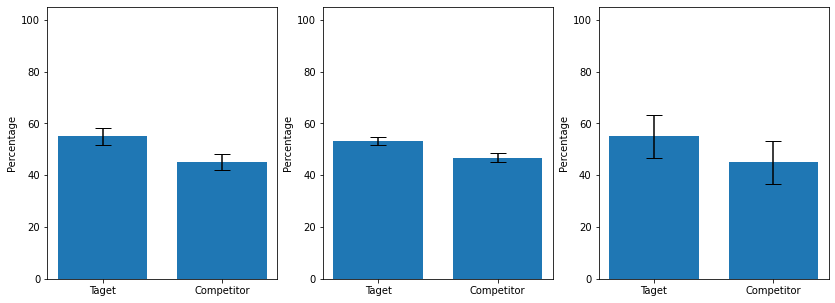

In [91]:
labels = ['Taget', 'Competitor']

x = np.arange(len(labels))

y1 = np.array([target_Y_SD_Phan_mean, competitor_Y_SD_Phan_mean])
y2 = np.array([target_N_SD_Phan_mean, competitor_N_SD_Phan_mean])
y3 = np.array([target_N2_SD_Phan_mean, competitor_N2_SD_Phan_mean])

error1 = np.array([target_Y_SD_Phan_sem, competitor_Y_SD_Phan_sem])
error2 = np.array([target_N_SD_Phan_sem, competitor_N_SD_Phan_sem])
error3 = np.array([target_N2_SD_Phan_sem, competitor_N2_SD_Phan_sem])

y1s = np.array([y1, y2, y3])
errors1 = np.array([error1, error2, error3])

fig, ax = plt.subplots(1, 3, figsize=(14, 5))
                       
for x in range(3):
    
    ax[x].bar(labels, y1s[x], 0.75, yerr=errors1[x], capsize=8)
    ax[x].set_ylim(0, 105)
    ax[x].set_ylabel('Percentage')
    #ax[x].set_title(titles[x])
        
plt.show()

#### Y_SD 

In [92]:
Y_SD_Phan_df.head()

,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Survey_ID,CouplingCondition,PhantomCondition
404,P,Wifi extender,P_B,A,B,A,NaN,10000,1766.0,0,37993,High coupling,Undesirable
408,P,Countertop blender,A,P_B,B,A,NaN,10000,7564.0,1,37993,High coupling,Undesirable
414,P,Baby stroller,A,B,P_B,A,NaN,10000,791.2,0,37993,High coupling,Undesirable
415,P,Air purifier,A,P_A,B,B,NaN,10000,1518.5,0,37993,High coupling,Undesirable
421,P,Electric mop,B,P_B,A,A,NaN,10000,499.5,0,37993,High coupling,Undesirable


In [93]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#import scipy.stats as stats
# Going to use z-core scaling to normalize the data.

#norm = StandardScaler() #z-score it

#similarity_scores_all_norm = norm.fit_transform(similarity_scores_all)
#compromise_Scores_all_norm = norm.fit_transform(compromise_Scores_all)
#attention_scores_all_norm = norm.fit_transform(attention_scores_all)

#print(similarity_scores_all_norm.shape)

#similarity_scores_all_norm = similarity_scores_all_norm.flatten()
#compromise_Scores_all_norm = compromise_Scores_all_norm.flatten()
#attention_scores_all_norm = attention_scores_all_norm.flatten()

#print(similarity_scores_all_norm.shape)

#all_decoys_norm_df = pd.DataFrame(data={'Similarity_norm': similarity_scores_all_norm,
#                  'Compromise_norm': compromise_Scores_all_norm,
#                  'Attention_norm': attention_scores_all_norm}, index=range(total_n))

#corr_sim_com = stats.pearsonr(all_decoys_norm_df["Similarity_norm"], all_decoys_norm_df["Compromise_norm"])
#corr_sim_att = stats.pearsonr(all_decoys_norm_df["Similarity_norm"], all_decoys_norm_df["Attention_norm"])
#corr_att_com = stats.pearsonr(all_decoys_norm_df["Attention_norm"], all_decoys_norm_df["Compromise_norm"])

#all_decoys_norm_df.head()